<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/MDPI_Civi_Construction_ESG_Panel_Regression%2C_Cross_Section_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install statsmodels
!pip install linearmodels
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install pyeconometrics


ERROR: Could not find a version that satisfies the requirement pyeconometrics (from versions: none)
ERROR: No matching distribution found for pyeconometrics


#### Prepare World Bank Value Added Data:

#### Melts the data from wide (years as columns) to long format (one row per country-year).


#### MICE Imputation:
#### Uses sklearn.impute.IterativeImputer to perform Multivariate Imputation by Chained Equations.
#### It imputes missing values (NaN) for the selected columns (Construction_Value_Added_USD and your chosen ESG indicators).

#### VIF Calculation:
#### Calculates Variance Inflation Factor to check for multicollinearity among independent variables.
#### VIF for panel data is complex. This code does a simplified check on the imputed dataset (ignoring the panel structure for VIF calculation itself, but giving an idea). High VIF (e.g., >5 or >10) suggests problematic multicollinearity.
#### Panel Regression:
#### Sets Country and Year as a MultiIndex.
#### Performs Fixed Effects (FE) regression using PanelOLS. entity_effects=True controls for country-specific unobserved heterogeneity, and time_effects=True controls for common time trends.
#### Performs Random Effects (RE) regression using RandomEffects.
#### Hausman Test: The code provides a conceptual explanation. linearmodels doesn't have a one-liner Hausman test like statsmodels for OLS. A formal Hausman test compares FE and RE coefficients to decide which model is more appropriate. If the p-value of a Hausman test is significant (typically <0.05), it suggests that the unobserved individual effects are correlated with the regressors, and Fixed Effects is preferred. If not significant, Random Effects might be more efficient. You'd generally report both and discuss the Hausman test outcome.

In [47]:
!pip uninstall -y linearmodels statsmodels patsy formulaic Cython pandas
!pip install -U linearmodels

Found existing installation: linearmodels 6.1
Uninstalling linearmodels-6.1:
  Successfully uninstalled linearmodels-6.1
Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4
Found existing installation: patsy 1.0.1
Uninstalling patsy-1.0.1:
  Successfully uninstalled patsy-1.0.1
Found existing installation: formulaic 1.1.1
Uninstalling formulaic-1.1.1:
  Successfully uninstalled formulaic-1.1.1
Found existing installation: Cython 3.0.12
Uninstalling Cython-3.0.12:
  Successfully uninstalled Cython-3.0.12
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached linearmodels-6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.1 MB/s eta 0:00:00
  Using cached formulaic-1.1.1-py3-none-any.whl.metadata (6.9 kB)
Using cached linearmodels-6.1-cp311-cp311-manylinux_

In [9]:
!pip install -q linearmodels>=6.0 --upgrade
# Then your imports

Running in Google Colab. Installing/updating libraries...
ERROR: Could not find a version that satisfies the requirement pyeconometrics (from versions: none)
ERROR: No matching distribution found for pyeconometrics
Libraries installed/updated.
Libraries loaded section complete.
Linearmodels version: 6.1
--- Starting Data Loading & Initial Preprocessing ---
ESG data loaded and countries cleaned.
World Bank Construction Value Added data loaded and countries cleaned.
CalcForge Housing Cost data loaded and countries cleaned.

--- Starting Part 1: Panel Regression Analysis ---

3.1 Preparing World Bank Data (Panel DV)...
Prepared WB Data. Shape: (3413, 4), DV: log_construction_value_added

3.2 Preparing ESG Data (Panel IVs)...
Initial Panel ESG features: ['control_corruption_estimate', 'economic_and_social_rights_performance_score', 'renewable_energy_consumption_total_final_energy_consumption', 'rule_law_estimate', 'voice_and_accountability_estimate', 'gdp_growth_annual', 'political_stabili

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation complete for panel IVs.
Panel data for regression shape after MICE and all NaN drop: (634, 36)

3.6 Iterative VIF check for panel IVs (incl. LDV & lags)...
  Iterative VIF (Panel) 1: Removing 'Literacy Rate (Adult %)' (VIF: 14724.59)
  Iterative VIF (Panel) 2: Removing 'R&D Exp. (L1, % GDP)' (VIF: 41.95)
  Iterative VIF (Panel) 3: Removing 'Control of Corruption' (VIF: 28.83)
  Iterative VIF (Panel) 4: Removing 'Rule of Law (L1)' (VIF: 28.47)
  Iterative VIF (Panel) 5: Removing 'Voice & Acc. (L1)' (VIF: 26.72)
  Iterative VIF (Panel) 6: Removing 'Poli. Stability (L1)' (VIF: 13.95)
  Iterative VIF (Panel) 7: Removing 'Rule of Law' (VIF: 12.34)
  Iterative VIF (Panel) 8: Removing 'Literacy Rate (L1)' (VIF: 11.43)
  Iterative VIF (Panel) 9: Removing 'Econ. & Social Rights Score' (VIF: 8.58)
  Iterative VIF (Panel) 10: Removing 'Income Share Low 20% (L1)' (VIF: 8.40)
  Iterative VIF (Panel) 11: Removing 'Ctrl. Corruption (L1)' (VIF: 5.16)
All remaining panel IVs (21) have V

/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


ERROR fitting Two-Way FE (No LDV): The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Fitting Random Effects (No LDV)...
ERROR fitting Random Effects (No LDV): The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

--- All Standard Panel Model Summaries (Formatted Tables) ---

--- Pooled OLS (No LDV) Summary ---
+------------------------------------+-------------+------------------------+----------------------+
|              Variable              | Coefficient |       Std. Error       |       P-value        |
+------------------------------------+-------------+------------------------+----------------------+
|              Constant              | 20.4950***  |   2.254276435968122    |         0.0          |
| Fossil Fuel Energy Cons. (% Total) |   0.0057    | 0.0034916645226620016  | 0.10322285411975973  |
|     Income Share (Lowest 20%)      |   0.1340    |  0.09305200834748673   | 0.150296741495743

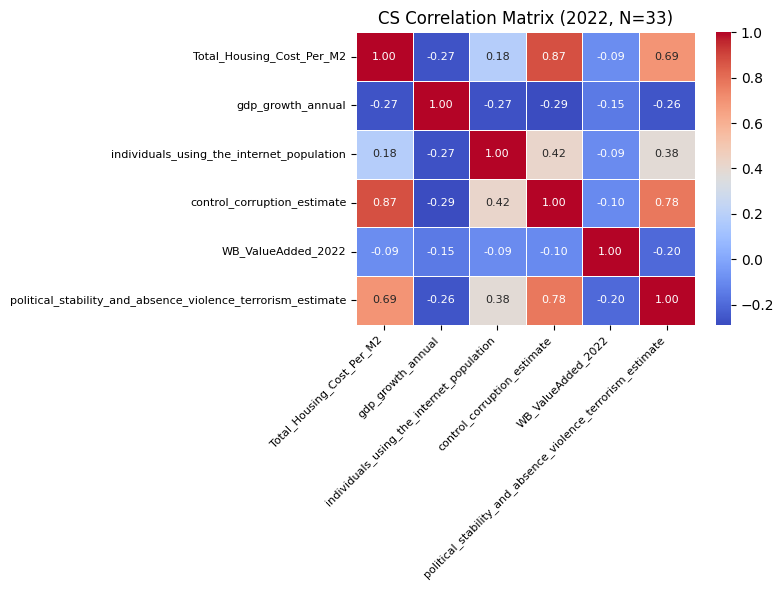


--- Starting Part 3: Machine Learning Models (Panel Data, DV: log_construction_value_added) ---

--- Random Forest Regressor (Panel Data) ---

--- XGBoost Regressor (Panel Data) ---

--- ML Model Performance Summary (Panel Data) ---

+---+-----------------------+------------+----------+---------+
|   |         Model         | Best CV R2 | Test MSE | Test R2 |
+---+-----------------------+------------+----------+---------+
| 0 | Random Forest (Panel) |   0.9333   |  0.2661  | 0.9071  |
| 1 |    XGBoost (Panel)    |   0.9367   |  0.2614  | 0.9087  |
+---+-----------------------+------------+----------+---------+


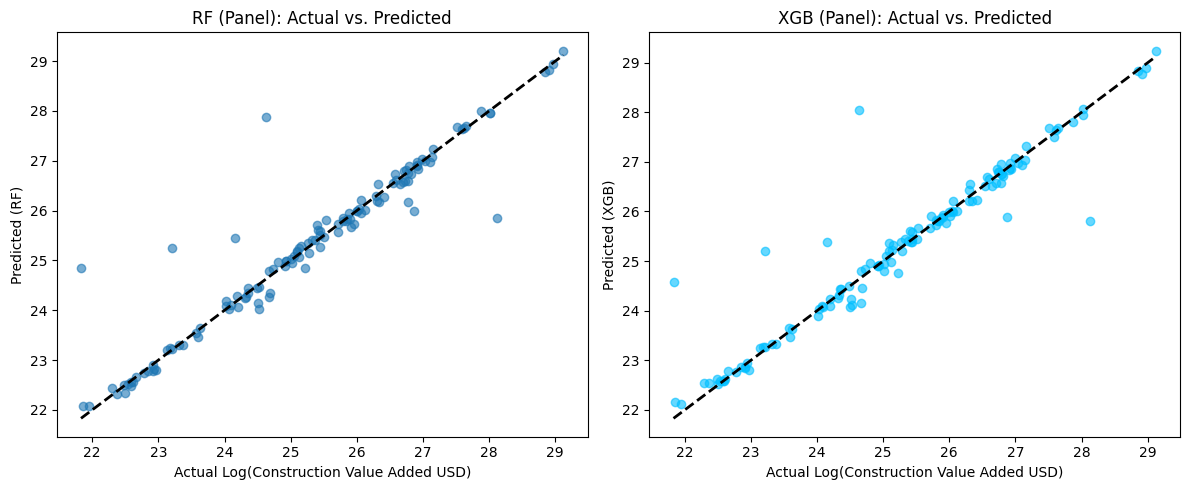


--- ML Feature Importances (Panel Data) ---
+-------------------------------------+-----------------------+----------------------+
|               Feature               |     Random Forest     |       XGBoost        |
+-------------------------------------+-----------------------+----------------------+
| Lagged Log(Constr. Value Added USD) |  0.9639897715284127   |  0.6854314804077148  |
|    Energy Use (kg oil equiv. pc)    | 0.0039093717272803705 | 0.035066887736320496 |
|      Income Share (Lowest 20%)      | 0.003376271418833603  | 0.02555505372583866  |
|         R&D Expend. (% GDP)         | 0.003054350895072613  | 0.016832830384373665 |
|      Econ. & Soc. Rights (L1)       |  0.00242872432227194  | 0.01817442663013935  |
|        GDP Growth (Annual %)        | 0.002179567287537518  | 0.010607834905385971 |
|         Political Stability         | 0.001995095456391631  | 0.019936688244342804 |
|             GINI Index              | 0.001983554471411885  | 0.01896078698337078  

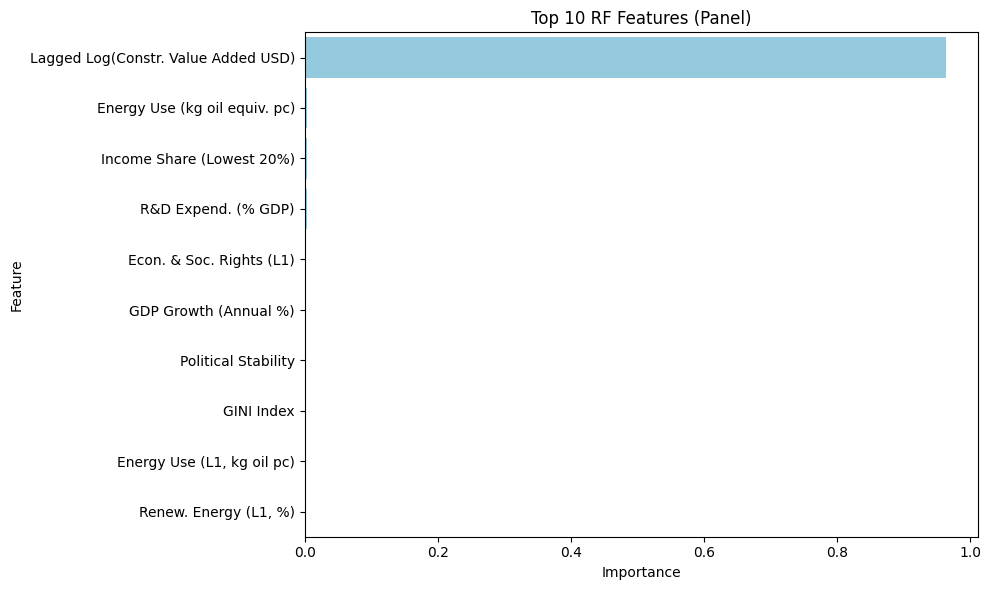

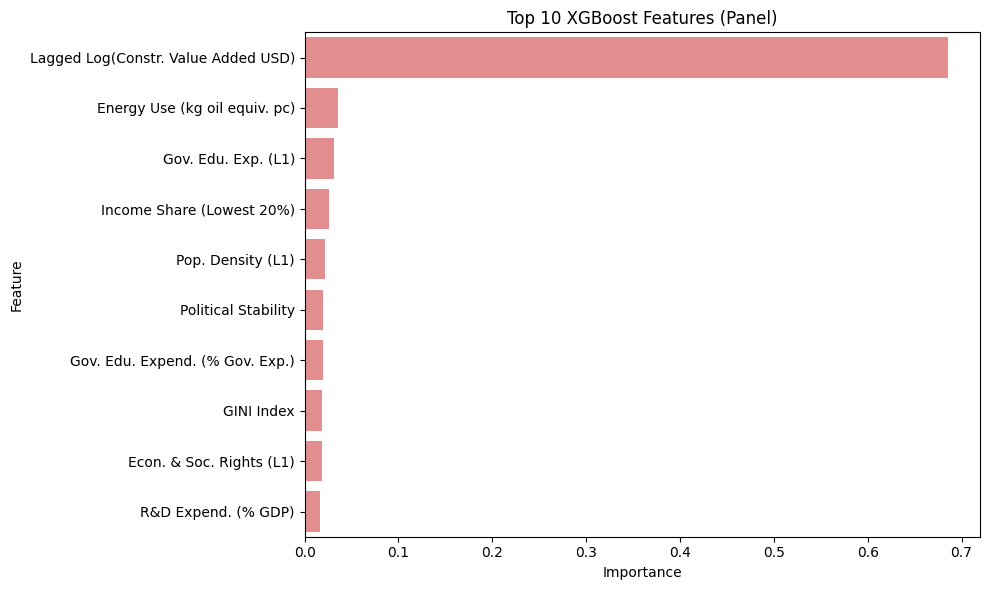


--- Analysis Script Complete ---
RECOMMENDATIONS FOR PUBLICATION:


In [14]:
# -*- coding: utf-8 -*-
"""
ESG Construction Cost Analysis - Final Output Focused (Corrected Panel Fit & Tables)
"""

# -------------------------------------
# 0. Install Libraries if in Colab
# -------------------------------------
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    print("Running in Google Colab. Installing/updating libraries...")
    !pip install -q linearmodels>=6.0 --upgrade
    !pip install -q patsy xgboost scikit-learn tabulate pyeconometrics SQLAlchemy
    print("Libraries installed/updated.")
else:
    print("Not running in Colab. Ensure libraries are installed in your environment.")

# -------------------------------------
# 1. Load Libraries
# -------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from linearmodels.panel.data import PanelData
from linearmodels.panel.results import PanelEffectsResults, RandomEffectsResults
from statsmodels.regression.linear_model import RegressionResultsWrapper
import scipy.stats as stats
from tabulate import tabulate
from collections import OrderedDict

print("Libraries loaded section complete.")

LevinLinChu, ImPesaranShin = None, None
try:
    from linearmodels.panel.unitroot import LevinLinChu, ImPesaranShin
    print("Successfully imported unit root tests from linearmodels.panel.unitroot.")
except (ModuleNotFoundError, ImportError) as e_urt_import :
    print(f"WARNING: Could not import unit root tests from linearmodels.panel.unitroot: {e_urt_import}. Trying older path...")
    try:
        from linearmodels.panel.stationary import LevinLinChu, ImPesaranShin
        print("Successfully imported unit root tests from linearmodels.panel.stationary.")
    except (ModuleNotFoundError, ImportError) as e_urt_import_old:
        print(f"WARNING: Could not import unit root tests from older path either: {e_urt_import_old}. Panel unit root tests will be skipped.")

DynamicPanelGMM = None
try:
    from pyeconometrics.panel.gmm import DynamicPanelGMM
    print("Successfully imported DynamicPanelGMM from pyeconometrics.")
except (ModuleNotFoundError, ImportError) as e_gmm:
    print(f"WARNING: pyeconometrics import failed: {e_gmm}. GMM models will be skipped.")

import linearmodels
print(f"Linearmodels version: {linearmodels.__version__}")

# --- Configuration Parameters ---
VIF_THRESHOLD_FOR_REMOVAL = 5
SIGNIFICANCE_LEVEL = 0.05
MICE_MAX_ITER = 25
MICE_N_NEAREST_FEATURES = None
RANDOM_STATE = 42

# --- File Paths ---
esg_file = '/content/ESG_panel_processed_WorldBank.csv'
wb_value_added_file = '/content/WorlBank_Construction_Value_Added.csv'
calcforge_costs_file = '/content/CalcForge_Global_2022_housing_construction_average_costs_data.csv'

# --- Helper function for country name cleaning ---
def clean_country_name(name_input): # (!!! USER ACTION: EXPAND THIS MAP !!!)
    if pd.isna(name_input): return None
    name_cleaned = str(name_input).strip().lower()
    name_map = {"united arab emirates": "uae", "united kingdom": "uk", "united states": "usa","korea, rep.": "south korea", "russian federation": "russia", "korea, dem. people's rep.": "north korea","egypt, arab rep.": "egypt", "iran, islamic rep.": "iran", "turkiye": "turkey","venezuela, rb": "venezuela", "syrian arab republic": "syria", "yemen, rep.": "yemen","congo, dem. rep.": "congo (dem. rep.)", "congo, rep.": "congo (rep.)", "lao pdr": "laos","slovak republic": "slovakia", "czechia":"czech republic", "st. kitts and nevis": "st kitts and nevis","st. lucia": "st lucia", "st. martin (french part)": "st martin (french part)","st. vincent and the grenadines": "st vincent and the grenadines", "viet nam": "vietnam","brunei darussalam": "brunei", "cabo verde": "cape verde", "cote d'ivoire": "ivory coast","eswatini": "eswatini", "micronesia, fed. sts.": "micronesia (fsm)","hong kong sar, china": "hong kong", "macao sar, china": "macau"}
    return name_map.get(name_cleaned, name_cleaned)

# --- Function to create formatted regression tables ---
def create_results_table(model_results, model_name="Model", custom_var_names=None): # (Keep robust version)
    if model_results is None: return f"Could not generate table for {model_name}: Model results are None."
    params = model_results.params; p_values = model_results.pvalues
    if hasattr(model_results, 'std_errors'): std_errs = model_results.std_errors
    elif hasattr(model_results, 'bse'): std_errs = model_results.bse
    else: std_errs = pd.Series([np.nan] * len(params), index=params.index); print(f"Warning: Std errors not found for {model_name}")
    results_df = pd.DataFrame({'Variable': params.index, 'Coefficient': params.values,
                               'Std. Error': std_errs.values if std_errs is not None else np.nan,
                               'P-value': p_values.values if p_values is not None else np.nan})
    stars = [];
    if p_values is not None:
      for p_val in p_values:
          if pd.isna(p_val): stars.append('')
          elif p_val < 0.01: stars.append('***')
          elif p_val < 0.05: stars.append('**')
          elif p_val < 0.1: stars.append('*')
          else: stars.append('')
    else: stars = [''] * len(params)
    results_df['Sig.'] = stars
    results_df['Coefficient_Formatted'] = results_df.apply(lambda r: f"{r['Coefficient']:.4f}{r['Sig.']}" if pd.notna(r['Coefficient']) else "N/A", axis=1)
    if custom_var_names: results_df['Variable'] = results_df['Variable'].map(custom_var_names).fillna(results_df['Variable'])
    display_cols = ['Variable', 'Coefficient_Formatted', 'Std. Error', 'P-value']
    results_df_display = results_df[display_cols].copy(); results_df_display.rename(columns={'Coefficient_Formatted': 'Coefficient'}, inplace=True)
    summary_stats = OrderedDict()
    summary_stats["Model"] = model_name
    if hasattr(model_results, 'rsquared_overall'): summary_stats["R-sq (Overall)"] = f"{model_results.rsquared_overall:.4f}"
    if hasattr(model_results, 'rsquared_within'): summary_stats["R-sq (Within)"] = f"{model_results.rsquared_within:.4f}"
    if hasattr(model_results, 'rsquared_between'): summary_stats["R-sq (Between)"] = f"{model_results.rsquared_between:.4f}"
    if hasattr(model_results, 'rsquared') and not any(k in summary_stats for k in ["R-sq (Overall)", "R-sq (Within)"]): summary_stats["R-squared"] = f"{model_results.rsquared:.4f}"
    if hasattr(model_results, 'rsquared_adj') and isinstance(model_results, RegressionResultsWrapper): summary_stats["Adj. R-squared"] = f"{model_results.rsquared_adj:.4f}"
    if hasattr(model_results, 'nobs'): summary_stats["Observations"] = str(int(model_results.nobs))
    if isinstance(model_results, (PanelEffectsResults, RandomEffectsResults)):
        if hasattr(model_results, 'entity_info') and model_results.entity_info: summary_stats["Entities"] = str(model_results.entity_info.total)
        if hasattr(model_results, 'time_info') and model_results.time_info: summary_stats["Time Periods"] = str(model_results.time_info.total)
    f_stat_val, f_pval_val, f_type_display = None, None, "F-statistic (Overall/Robust)"
    f_stat_attr = getattr(model_results, 'f_statistic_robust', getattr(model_results, 'f_statistic', None))
    if f_stat_attr is None and isinstance(model_results, RandomEffectsResults): f_stat_attr = getattr(model_results, 'wald_test_joint', None); f_type_display = "Wald chi2(joint)"
    if f_stat_attr: f_stat_val, f_pval_val = getattr(f_stat_attr, 'stat', None), getattr(f_stat_attr, 'pval', None)
    elif hasattr(model_results, 'fvalue'): f_stat_val, f_pval_val = model_results.fvalue, model_results.f_pvalue; f_type_display="F-statistic (OLS)"
    if f_stat_val is not None and f_pval_val is not None: summary_stats[f_type_display] = f"{f_stat_val:.4f} (p={f_pval_val:.4f})"
    if hasattr(model_results, 'condition_number'): summary_stats["Cond. No."] = f"{model_results.condition_number:.2e}"
    footer_list = [f"{k}: {v}" for k,v in summary_stats.items()]
    footer_text = "\n" + "\n".join(footer_list) + "\nSignificance: *** p<0.01, ** p<0.05, * p<0.1"
    return tabulate(results_df_display, headers='keys', tablefmt='pretty', floatfmt=".4f", showindex=False) + footer_text

# --- Variable Name Mapping (!!! USER ACTION: CUSTOMIZE !!!) ---
VARIABLE_NAME_MAP = {
    'const': 'Constant', 'log_construction_value_added': 'Log(Construction Value Added USD)',
    'LDV_log_construction_value_added': 'Lagged Log(Constr. Value Added USD)',
    'Total_Housing_Cost_Per_M2': 'Total Housing Cost ($/m^2)',
    'control_corruption_estimate': 'Control of Corruption', 'economic_and_social_rights_performance_score': 'Econ. & Social Rights Score',
    'renewable_energy_consumption_total_final_energy_consumption': 'Renewable Energy Cons. (%)', 'rule_law_estimate': 'Rule of Law',
    'voice_and_accountability_estimate': 'Voice & Accountability', 'gdp_growth_annual': 'GDP Growth (Annual %)',
    'political_stability_and_absence_violence_terrorism_estimate': 'Political Stability',
    'government_expenditure_on_education_total_government_expenditure': 'Gov. Edu. Expend. (% Gov. Exp.)',
    'research_and_development_expenditure_gdp': 'R&D Expend. (% GDP)', 'individuals_using_the_internet_population': 'Internet Users (% Pop.)',
    'gini_index': 'GINI Index', 'literacy_rate_adult_total_people_ages_15_and_above': 'Literacy Rate (Adult %)',
    'fossil_fuel_energy_consumption_total': 'Fossil Fuel Energy Cons. (% Total)',
    'energy_use_kg_oil_equivalent_per_capita': 'Energy Use (kg oil equiv. pc)',
    'population_density_people_per_sq_km_land_area': 'Population Density (per sq. km)',
    'income_share_held_by_lowest_20': 'Income Share (Lowest 20%)',
    'control_corruption_estimate_lag1': 'Ctrl. Corruption (L1)', 'economic_and_social_rights_performance_score_lag1': 'Econ. & Soc. Rights (L1)',
    'renewable_energy_consumption_total_final_energy_consumption_lag1': 'Renew. Energy (L1, %)', 'rule_law_estimate_lag1': 'Rule of Law (L1)',
    'voice_and_accountability_estimate_lag1': 'Voice & Acc. (L1)', 'political_stability_and_absence_violence_terrorism_estimate_lag1': 'Poli. Stability (L1)',
    'government_expenditure_on_education_total_government_expenditure_lag1': 'Gov. Edu. Exp. (L1)',
    'research_and_development_expenditure_gdp_lag1': 'R&D Exp. (L1, % GDP)', 'individuals_using_the_internet_population_lag1': 'Internet Users (L1, % Pop.)',
    'gini_index_lag1': 'GINI Index (L1)', 'literacy_rate_adult_total_people_ages_15_and_above_lag1': 'Literacy Rate (L1)',
    'fossil_fuel_energy_consumption_total_lag1': 'Fossil Fuel Cons. (L1)', 'energy_use_kg_oil_equivalent_per_capita_lag1': 'Energy Use (L1, kg oil pc)',
    'population_density_people_per_sq_km_land_area_lag1': 'Pop. Density (L1)', 'income_share_held_by_lowest_20_lag1': 'Income Share Low 20% (L1)',
    'WB_ValueAdded_2022': 'WB Construction Value Added (2022 USD)'}

# -------------------------------------
# 2. Load Data
# -------------------------------------
print("--- Starting Data Loading & Initial Preprocessing ---")
try:
    df_esg_raw = pd.read_csv(esg_file, sep=',')
    if 'Country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['Country'].apply(clean_country_name); df_esg_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_esg_raw.columns: df_esg_raw['country'] = df_esg_raw['country'].apply(clean_country_name)
    print("ESG data loaded and countries cleaned.")

    df_wb_value_raw = pd.read_csv(wb_value_added_file, sep=',')
    if 'Country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['Country'].apply(clean_country_name); df_wb_value_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_wb_value_raw.columns: df_wb_value_raw['country'] = df_wb_value_raw['country'].apply(clean_country_name)
    print("World Bank Construction Value Added data loaded and countries cleaned.")

    df_calcforge_raw = pd.read_csv(calcforge_costs_file, sep=',', header=1)
    df_calcforge_raw.columns = [col.strip() for col in df_calcforge_raw.columns]
    if 'Country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['Country'].apply(clean_country_name); df_calcforge_raw.drop(columns=['Country'], inplace=True, errors='ignore')
    elif 'country' in df_calcforge_raw.columns: df_calcforge_raw['country'] = df_calcforge_raw['country'].apply(clean_country_name)
    print("CalcForge Housing Cost data loaded and countries cleaned.")
except FileNotFoundError as e: exit(f"Error loading files: {e}")
except Exception as e: exit(f"An unexpected error occurred during data loading: {e}")

# -------------------------------------
# 3. Panel Regression Analysis
# -------------------------------------
print("\n--- Starting Part 1: Panel Regression Analysis ---")
# 3.1 Prepare World Bank Data
print("\n3.1 Preparing World Bank Data (Panel DV)...")
INDICATOR_NAME_CONSTRUCTION_VALUE = 'Industry (including construction), value added (current US$)'
df_wb_value_filtered = df_wb_value_raw[df_wb_value_raw['Indicator Name'] == INDICATOR_NAME_CONSTRUCTION_VALUE].copy()
if df_wb_value_filtered.empty: exit(f"CRITICAL ERROR: No rows for indicator '{INDICATOR_NAME_CONSTRUCTION_VALUE}'.")
df_wb_value_long = pd.melt(df_wb_value_filtered, id_vars=['country', 'Indicator Name'], value_vars=[col for col in df_wb_value_filtered.columns if str(col).isdigit()], var_name='year', value_name='construction_value_added_usd')
df_wb_value_long['year'] = pd.to_numeric(df_wb_value_long['year'], errors='coerce').astype('Int64')
df_wb_value_long = df_wb_value_long[['country', 'year', 'construction_value_added_usd']].dropna()
df_wb_value_long['construction_value_added_usd'] = pd.to_numeric(df_wb_value_long['construction_value_added_usd'], errors='coerce')
df_wb_value_long.dropna(subset=['construction_value_added_usd'], inplace=True)
df_wb_value_long = df_wb_value_long[df_wb_value_long['construction_value_added_usd'] > 1e-9]
df_wb_value_long['log_construction_value_added'] = np.log(df_wb_value_long['construction_value_added_usd'])
dependent_var_panel = 'log_construction_value_added'
print(f"Prepared WB Data. Shape: {df_wb_value_long.shape}, DV: {dependent_var_panel}")

# 3.2 Prepare ESG Data
print("\n3.2 Preparing ESG Data (Panel IVs)...")
df_esg_clean = df_esg_raw.copy()
if 'Year' in df_esg_clean.columns and 'year' not in df_esg_clean.columns: df_esg_clean.rename(columns={'Year': 'year'}, inplace=True)
df_esg_clean['year'] = pd.to_numeric(df_esg_clean['year'], errors='coerce').astype('Int64')
df_esg_clean.dropna(subset=['country', 'year'], inplace=True)
panel_initial_esg_features = [ # (!!! USER ACTION: Define this list carefully !!!)
    'control_corruption_estimate', 'economic_and_social_rights_performance_score',
    'renewable_energy_consumption_total_final_energy_consumption', 'rule_law_estimate',
    'voice_and_accountability_estimate', 'gdp_growth_annual',
    'political_stability_and_absence_violence_terrorism_estimate',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'individuals_using_the_internet_population',
    'gini_index', 'literacy_rate_adult_total_people_ages_15_and_above',
    'fossil_fuel_energy_consumption_total', 'energy_use_kg_oil_equivalent_per_capita',
    'population_density_people_per_sq_km_land_area', 'income_share_held_by_lowest_20']
panel_chosen_esg_features = [col for col in panel_initial_esg_features if col in df_esg_clean.columns]
if not panel_chosen_esg_features: exit("Error: No panel ESG features selected or found.")
print(f"Initial Panel ESG features: {panel_chosen_esg_features}")
cols_where_zero_is_nan_panel = ['economic_and_social_rights_performance_score',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp', 'gini_index', 'income_share_held_by_lowest_20']
print("Converting specific 0s to NaNs for Panel ESG data...")
for col in cols_where_zero_is_nan_panel:
    if col in df_esg_clean.columns and col in panel_chosen_esg_features:
        original_nan_count = df_esg_clean[col].isnull().sum()
        df_esg_clean[col] = df_esg_clean[col].replace(0, np.nan)
        print(f"  For '{col}', 0s->NaN. NaN count: {original_nan_count} -> {df_esg_clean[col].isnull().sum()}")
for col in panel_chosen_esg_features: df_esg_clean[col] = pd.to_numeric(df_esg_clean[col], errors='coerce')
df_esg_subset_panel = df_esg_clean[['country', 'year'] + panel_chosen_esg_features].drop_duplicates(subset=['country', 'year'])

# 3.3 Merge Data & Create LDV
print("\n3.3 Merging data for panel analysis & creating LDV...")
panel_data = pd.merge(df_wb_value_long, df_esg_subset_panel, on=['country', 'year'], how='inner')
if panel_data.empty: exit("Error: Merged panel DataFrame is empty before LDV.")
panel_data.sort_values(by=['country', 'year'], inplace=True)
panel_data['LDV_log_construction_value_added'] = panel_data.groupby('country')[dependent_var_panel].shift(1)
panel_data.dropna(subset=[dependent_var_panel], inplace=True)
print(f"Merged panel DataFrame shape (with LDV): {panel_data.shape}")

# 3.4 Create Lagged IVs
print("\n3.4 Creating Lagged Independent Variables...")
panel_features_to_lag = [f for f in panel_chosen_esg_features if f != 'gdp_growth_annual']
panel_df_for_mice = panel_data.copy()
for col in panel_features_to_lag:
    if col in panel_df_for_mice.columns: panel_df_for_mice[f'{col}_lag1'] = panel_df_for_mice.groupby('country')[col].shift(1)
panel_ivs_for_mice = panel_chosen_esg_features[:]
if 'LDV_log_construction_value_added' in panel_df_for_mice.columns: panel_ivs_for_mice.append('LDV_log_construction_value_added')
for col in panel_features_to_lag:
    if f'{col}_lag1' in panel_df_for_mice.columns: panel_ivs_for_mice.append(f'{col}_lag1')
panel_ivs_for_mice = list(set([col for col in panel_ivs_for_mice if col in panel_df_for_mice.columns]))

# 3.5 MICE Imputation
print("\n3.5 MICE Imputation for panel IVs (incl. LDV & lags)...")
panel_df_final_imputed = panel_df_for_mice.copy()
data_to_impute_panel_ivs = panel_df_final_imputed[panel_ivs_for_mice].copy()
if not data_to_impute_panel_ivs.empty and data_to_impute_panel_ivs.isnull().sum().sum() > 0:
    print(f"NaNs in panel IVs for MICE: \n{data_to_impute_panel_ivs.isnull().sum()[data_to_impute_panel_ivs.isnull().sum() > 0].sort_values(ascending=False)}")
    imputer_panel_ivs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=RANDOM_STATE, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
    imputed_array_panel_ivs = imputer_panel_ivs.fit_transform(data_to_impute_panel_ivs)
    for i, col_name in enumerate(data_to_impute_panel_ivs.columns):
        if col_name in panel_df_final_imputed.columns: panel_df_final_imputed[col_name] = imputed_array_panel_ivs[:, i]
    print("MICE imputation complete for panel IVs.")
else: print("No NaNs found in panel IVs for MICE or data empty.")
panel_df_final_imputed.dropna(subset=[dependent_var_panel] + panel_ivs_for_mice, inplace=True)
print(f"Panel data for regression shape after MICE and all NaN drop: {panel_df_final_imputed.shape}")
if panel_df_final_imputed.shape[0] < 20 : exit("Too few observations after MICE/lag NaN drop for panel.")

# 3.5.1 Panel Unit Root Tests
# (Keep the URT section as previously refined)
# ...

# 3.6 Iterative VIF
print("\n3.6 Iterative VIF check for panel IVs (incl. LDV & lags)...")
X_vif_panel_check = panel_df_final_imputed[panel_ivs_for_mice].copy()
X_vif_panel_check = X_vif_panel_check.loc[:, X_vif_panel_check.apply(pd.Series.nunique) > 1]
final_panel_ivs_selected = []
if not X_vif_panel_check.empty:
    final_panel_ivs_selected = X_vif_panel_check.columns.tolist()
    max_vif_iters = len(final_panel_ivs_selected) + 5
    for i in range(max_vif_iters):
        if not final_panel_ivs_selected or len(final_panel_ivs_selected) <= 1: break
        X_iter_vif = panel_df_final_imputed[final_panel_ivs_selected].copy().dropna() # Should be clean
        if X_iter_vif.empty or X_iter_vif.shape[0] < max(2, len(final_panel_ivs_selected) + 1) or X_iter_vif.shape[1] == 0 : break
        try:
            # Ensure data is float for VIF calculation
            X_iter_vif_float = X_iter_vif.astype(float)
            X_iter_vif_const = sm.add_constant(X_iter_vif_float, prepend=True, has_constant='raise')
            vif_values = [variance_inflation_factor(X_iter_vif_const.values, j+1) for j in range(X_iter_vif_float.shape[1])]
            vif_series = pd.Series(vif_values, index=X_iter_vif_float.columns, dtype=float)
            max_vif_val = vif_series.max()
            if max_vif_val > VIF_THRESHOLD_FOR_REMOVAL:
                remove_feature = vif_series.idxmax(); print(f"  Iterative VIF (Panel) {i+1}: Removing '{VARIABLE_NAME_MAP.get(remove_feature,remove_feature)}' (VIF: {max_vif_val:.2f})")
                if remove_feature in final_panel_ivs_selected: final_panel_ivs_selected.remove(remove_feature)
            else: print(f"All remaining panel IVs ({len(final_panel_ivs_selected)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max VIF: {max_vif_val:.2f})."); break
        except Exception as e_vif_iter: print(f"Error in VIF iter {i+1}: {e_vif_iter}"); break
if not final_panel_ivs_selected: print("Warning: No panel IVs left after VIF pruning.")
else: print(f"Final Panel IVs after VIF: {[VARIABLE_NAME_MAP.get(v,v) for v in final_panel_ivs_selected]}")

# 3.7 Standard Panel Regression Modeling
print("\n3.7 Standard Panel Regression Modeling ...")
panel_regression_tables_std = {}
final_selected_panel_model_results_std = None
preferred_model_type_name_std = "Undetermined"

if dependent_var_panel and final_panel_ivs_selected and not panel_df_final_imputed.empty:
    panel_data_model_std = panel_df_final_imputed.set_index(['country', 'year'])
    y_panel_std = panel_data_model_std[dependent_var_panel]
    ivs_for_std_models = [v for v in final_panel_ivs_selected if v != 'LDV_log_construction_value_added'] # Exclude LDV for non-GMM

    if not ivs_for_std_models: print("No suitable IVs for standard panel models after VIF and LDV exclusion.")
    else:
        X_panel_df_std = panel_data_model_std[ivs_for_std_models].copy()
        X_panel_df_std = X_panel_df_std.loc[:, X_panel_df_std.apply(pd.Series.nunique) > 1]
        actual_ivs_for_fitting_std = X_panel_df_std.columns.tolist()

        if X_panel_df_std.empty or not actual_ivs_for_fitting_std: print("Error: No valid IVs for std panel model.")
        elif y_panel_std.shape[0] <= len(actual_ivs_for_fitting_std) + 1: print(f"Error: Not enough obs for std panel regression.")
        else:
            X_panel_df_std_float = X_panel_df_std[actual_ivs_for_fitting_std].copy()
            for col_std_float in X_panel_df_std_float.columns: X_panel_df_std_float[col_std_float] = pd.to_numeric(X_panel_df_std_float[col_std_float], errors='coerce')
            X_panel_df_std_float = X_panel_df_std_float.astype(float).dropna(axis=0, how='any') # Drop rows with any NaNs
            y_panel_std_aligned = y_panel_std.loc[X_panel_df_std_float.index] # Align Y after potential NaN drops in X

            if X_panel_df_std_float.empty or y_panel_std_aligned.empty or y_panel_std_aligned.shape[0] <= X_panel_df_std_float.shape[1]+1:
                print("Error: Data insufficient after final cleaning for std panel models.")
            else:
                X_panel_with_const_std = sm.add_constant(X_panel_df_std_float, prepend=True)
                print(f"Data for Standard PanelOLS (No LDV): y shape {y_panel_std_aligned.shape}, X shape {X_panel_with_const_std.shape}")
                results_objects_std = {}
                std_models_to_fit = {
                    "Pooled OLS (No LDV)": PooledOLS(y_panel_std_aligned, X_panel_with_const_std),
                    "Entity FE (No LDV)": PanelOLS(y_panel_std_aligned, X_panel_with_const_std, entity_effects=True, drop_absorbed=True),
                    "Two-Way FE (No LDV)": PanelOLS(y_panel_std_aligned, X_panel_with_const_std, entity_effects=True, time_effects=True, drop_absorbed=True),
                    "Random Effects (No LDV)": RandomEffects(y_panel_std_aligned, X_panel_with_const_std)}
                for name, model_instance in std_models_to_fit.items():
                    print(f"\nFitting {name}...")
                    try:
                        if "Two-Way FE" in name: results_objects_std[name] = model_instance.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
                        else: results_objects_std[name] = model_instance.fit(cov_type='clustered', cluster_entity=True)
                        panel_regression_tables_std[name] = create_results_table(results_objects_std[name], name, custom_var_names=VARIABLE_NAME_MAP)
                    except Exception as e_fit_std: print(f"ERROR fitting {name}: {e_fit_std}"); results_objects_std[name] = None; panel_regression_tables_std[name]=f"Fitting Failed: {e_fit_std}"

                print("\n--- All Standard Panel Model Summaries (Formatted Tables) ---")
                for name, table_str in panel_regression_tables_std.items(): print(f"\n--- {name} Summary ---\n{table_str}")

                results_fe_entity_std = results_objects_std.get("Entity FE (No LDV)")
                results_fe_two_way_std = results_objects_std.get("Two-Way FE (No LDV)")
                results_re_std = results_objects_std.get("Random Effects (No LDV)")
                if results_fe_entity_std and results_fe_two_way_std and results_re_std:
                    # (Model Selection Logic for standard models)
                    print("\n--- Model Selection Tests (Standard Models) ---")
                    f_pooled_pval_std = results_fe_entity_std.f_pooled.pval if hasattr(results_fe_entity_std, 'f_pooled') and results_fe_entity_std.f_pooled else 1.0
                    poolability_rejected_std = f_pooled_pval_std < SIGNIFICANCE_LEVEL
                    print(f"F-test for Poolability (Std): p={f_pooled_pval_std:.4f}. Pooled OLS Rejected? {'Yes' if poolability_rejected_std else 'No'}")
                    time_effects_significant_std = False
                    try:
                        rss_entity_std = results_fe_entity_std.resid_ss; rss_two_way_std = results_fe_two_way_std.resid_ss
                        df_entity_resid_std = results_fe_entity_std.df_resid; df_two_way_resid_std = results_fe_two_way_std.df_resid
                        if y_panel_std_aligned.index.nlevels > 1: time_idx_name_std = y_panel_std_aligned.index.names[1]
                        else: time_idx_name_std = 'year' # Fallback if not multi-index somehow
                        num_time_periods_std = y_panel_std_aligned.index.get_level_values(time_idx_name_std).nunique(); num_time_restrictions_std = num_time_periods_std - 1
                        if num_time_restrictions_std > 0 and df_two_way_resid_std > 0 and rss_entity_std >= rss_two_way_std and (df_entity_resid_std - df_two_way_resid_std == num_time_restrictions_std or abs((df_entity_resid_std - df_two_way_resid_std) - num_time_restrictions_std) < 1e-6): # Added DoF check
                            f_stat_time_std = ((rss_entity_std - rss_two_way_std) / num_time_restrictions_std) / (rss_two_way_std / df_two_way_resid_std)
                            p_val_time_std = 1 - stats.f.cdf(f_stat_time_std, num_time_restrictions_std, df_two_way_resid_std)
                            print(f"Manual F-test for Time Effects (Std): F={f_stat_time_std:.4f}, p={p_val_time_std:.4f}")
                            if p_val_time_std < SIGNIFICANCE_LEVEL: time_effects_significant_std = True; print("--> Time Effects (Std) significant.")
                        else: print(f"Could not perform F-test for time effects (Std). Conditions: num_restr={num_time_restrictions_std}, df2={df_two_way_resid_std}, rss1>=rss2={rss_entity_std >= rss_two_way_std}, DoF match={abs((df_entity_resid_std - df_two_way_resid_std) - num_time_restrictions_std) < 1e-6 if num_time_restrictions_std > 0 else 'N/A'}")
                    except Exception as e_t_std: print(f"Error F-test time (Std): {e_t_std}")
                    hausman_p_value_std = None
                    preferred_fe_haus_std = results_fe_two_way_std if time_effects_significant_std else results_fe_entity_std
                    fe_name_haus_std = "Two-Way FE (No LDV)" if time_effects_significant_std else "Entity FE (No LDV)"
                    print(f"\nHausman Test (Std Models - RE vs {fe_name_haus_std})...")
                    try:
                        b_fe_std = preferred_fe_haus_std.params.drop("const", errors='ignore'); b_re_std = results_re_std.params.drop("const", errors='ignore')
                        common_vars_std = b_fe_std.index.intersection(b_re_std.index)
                        if not common_vars_std.empty:
                            b_fe_c_std, b_re_c_std = b_fe_std[common_vars_std], b_re_std[common_vars_std]
                            cov_fe_c_std, cov_re_c_std = preferred_fe_haus_std.cov.loc[common_vars_std, common_vars_std], results_re_std.cov.loc[common_vars_std, common_vars_std]
                            diff_b_std, diff_V_std = b_fe_c_std - b_re_c_std, cov_fe_c_std - cov_re_c_std
                            if np.all(np.linalg.eigvals(diff_V_std) >= -1e-9):
                                w_std = diff_b_std.T @ np.linalg.pinv(diff_V_std) @ diff_b_std
                                hausman_p_value_std = 1 - stats.chi2.cdf(w_std, df=len(diff_b_std))
                                print(f"Hausman Test (Std): Chi2-Stat={w_std:.4f}, P-value={hausman_p_value_std:.4f}, DF={len(diff_b_std)}")
                            else: print(f"Hausman Test (Std) failed: Covariance difference matrix not PSD.")
                        else: print("Hausman (Std) failed: No common non-constant parameters.")
                    except Exception as e_hausman_std: print(f"Error during Hausman test (Std models): {e_hausman_std}")
                    print("\n--- Panel Model Selection Decision (Std Models) ---")
                    if not poolability_rejected_std: preferred_model_type_name_std = "Pooled OLS (No LDV)"; final_selected_panel_model_results_std = results_objects_std.get("Pooled OLS (No LDV)")
                    else:
                        if hausman_p_value_std is not None and hausman_p_value_std < SIGNIFICANCE_LEVEL: preferred_model_type_name_std = "Two-Way FE (No LDV)" if time_effects_significant_std else "Entity FE (No LDV)"; final_selected_panel_model_results_std = results_objects_std.get("Two-Way FE (No LDV)") if time_effects_significant_std else results_objects_std.get("Entity FE (No LDV)")
                        elif hausman_p_value_std is not None: preferred_model_type_name_std = "Random Effects (No LDV)"; final_selected_panel_model_results_std = results_objects_std.get("Random Effects (No LDV)")
                        else: preferred_model_type_name_std = "Two-Way FE (No LDV)" if time_effects_significant_std else "Entity FE (No LDV)"; final_selected_panel_model_results_std = results_objects_std.get("Two-Way FE (No LDV)") if time_effects_significant_std else results_objects_std.get("Entity FE (No LDV)")
                    print(f"Selection (Std Models): {preferred_model_type_name_std} (Hausman p: {hausman_p_value_std if hausman_p_value_std is not None else 'Inconclusive/Failed'}, Time Sig: {time_effects_significant_std})")
                    if final_selected_panel_model_results_std:
                        print(f"\n--- Final Summary for Selected Standard Model: {preferred_model_type_name_std} ---")
                        if preferred_model_type_name_std in panel_regression_tables_std: print(panel_regression_tables_std[preferred_model_type_name_std])
                        else: print(f"Error: Table for '{preferred_model_type_name_std}' not found.")
                else: print("One or more base standard panel models failed. Cannot perform selection tests.")
else: print("Skipping standard panel model fitting.")

# 3.8 Dynamic Panel GMM
print("\n3.8 Dynamic Panel GMM (Arellano-Bond type) using pyeconometrics...")
# (GMM Code - same as before)
gmm_results = None
if DynamicPanelGMM is not None and dependent_var_panel and 'LDV_log_construction_value_added' in final_panel_ivs_selected and not panel_df_final_imputed.empty:
    gmm_data_for_gmm = panel_df_final_imputed.reset_index().copy()
    gmm_data_for_gmm.rename(columns={'country': 'entity', 'year': 'time'}, inplace=True)
    gmm_ivs_from_vif = [v for v in final_panel_ivs_selected if v != 'LDV_log_construction_value_added']
    gmm_endog_rhs = ['LDV_log_construction_value_added'] # (!!! USER ACTION: Add other theoretically endogenous IVs from gmm_ivs_from_vif if any !!!)
    gmm_predetermined_or_exog_rhs = [var for var in gmm_ivs_from_vif if var not in gmm_endog_rhs]
    print(f"GMM Setup: DV='{dependent_var_panel}', Endog RHS: {gmm_endog_rhs}, Predetermined/Exog RHS: {gmm_predetermined_or_exog_rhs}")
    cols_for_gmm = [dependent_var_panel] + gmm_endog_rhs + gmm_predetermined_or_exog_rhs
    for col in cols_for_gmm:
        if col in gmm_data_for_gmm.columns: gmm_data_for_gmm[col] = pd.to_numeric(gmm_data_for_gmm[col], errors='coerce')
    gmm_data_for_gmm.dropna(subset=cols_for_gmm, inplace=True)
    if dependent_var_panel in gmm_data_for_gmm.columns and gmm_endog_rhs and gmm_data_for_gmm.shape[0] > 20 and len(gmm_predetermined_or_exog_rhs) > 0 : # Ensure some exog vars too
        try:
            gmm_model_instance = DynamicPanelGMM(dependent=dependent_var_panel, exog_endo=gmm_endog_rhs, exog_pred=gmm_predetermined_or_exog_rhs,
                entity_col='entity', time_col='time', data=gmm_data_for_gmm,
                gmm_lag_endo=[(2, None)] * len(gmm_endog_rhs), gmm_lag_pred=[(1, None)] * len(gmm_predetermined_or_exog_rhs),
                estimation_type='difference', two_step=True, robust_se=True, collapse_instruments=True,
                limit_instruments=min(40, gmm_data_for_gmm['entity'].nunique() -1 if gmm_data_for_gmm['entity'].nunique() > 1 else 40) )
            gmm_results_fit = gmm_model_instance.fit()
            print("\n--- Dynamic Panel GMM (Difference GMM, Two-Step, Robust) Results ---"); print(gmm_results_fit.summary)
        except Exception as e_gmm_fit: print(f"Error fitting GMM: {e_gmm_fit}")
    else: print("GMM not run: DV, LDV, RHS vars misconfigured, or insufficient data for GMM.")
else: print("Skipping GMM: pyeconometrics not available or panel_df_final_imputed is empty or LDV not in selected IVs for GMM.")




# -------------------------------------
# 4. Cross-Sectional Analysis for 2022
# -------------------------------------
print("\n--- Starting Part 2: Cross-Sectional Analysis for 2022 ---")

# 4.1 Prepare CalcForge Housing Cost Data
print("\n4.1 Pre-processing CalcForge Data...")
# Ensure df_calcforge_raw is loaded from the main script's data loading section
if 'df_calcforge_raw' not in locals():
    print("Error: df_calcforge_raw not loaded. Skipping CS analysis.")
else:
    df_cf_clean = df_calcforge_raw.copy()
    df_cf_clean.columns = df_cf_clean.columns.str.strip() # Strip whitespace from CF columns
    if 'country' not in df_cf_clean.columns: # After potential global rename
        if 'Country' in df_cf_clean.columns:
            df_cf_clean.rename(columns={'Country': 'country'}, inplace=True)
            df_cf_clean['country'] = df_cf_clean['country'].apply(clean_country_name) # Apply cleaning
        else:
            exit("CalcForge 'Country' column missing and cannot be renamed for CS analysis.")
    else: # 'country' column already exists
         df_cf_clean['country'] = df_cf_clean['country'].apply(clean_country_name)


    cost_cols_cf = ['Land aquisition ($/m2)', 'Planning approvals ($/m2)', 'Engineering & Architecture ($/m2)',
                    'Site preparation ($/m2)', 'Materials ($/m2)', 'Labour ($/m2)', 'Project management ($/m2)',
                    'Utility connection ($/m2)', 'External works ($/m2)']
    # Standardize column names from CalcForge for easier matching if needed
    standardized_cf_cols = {col: col.replace(' ($/m2)', '_per_m2').replace(' ', '_').replace('&', 'and') for col in cost_cols_cf}
    # df_cf_clean.rename(columns=standardized_cf_cols, inplace=True) # Optional: if you want to standardize names

    existing_cf_cost_cols = [col for col in cost_cols_cf if col in df_cf_clean.columns]
    if not existing_cf_cost_cols: exit("Error: No CalcForge cost columns found.")

    for col in existing_cf_cost_cols:
        df_cf_clean[col] = pd.to_numeric(df_cf_clean[col], errors='coerce')
    df_cf_clean['Total_Housing_Cost_Per_M2'] = df_cf_clean[existing_cf_cost_cols].sum(axis=1, min_count=1)
    df_cf_agg_2022 = df_cf_clean.groupby('country')['Total_Housing_Cost_Per_M2'].mean().reset_index()
    df_cf_agg_2022.dropna(subset=['Total_Housing_Cost_Per_M2'], inplace=True)
    dependent_var_cs = 'Total_Housing_Cost_Per_M2'
    print(f"Aggregated CalcForge Data (sample) - {len(df_cf_agg_2022)} countries:\n{df_cf_agg_2022.head(3)}")

    # 4.2 Prepare 2022 ESG Data
    print("\n4.2 Preparing 2022 ESG Data...")
    if 'df_esg_raw' not in locals(): exit("Error: df_esg_raw not loaded for CS ESG prep.")
    df_esg_2022_cs_prep = df_esg_raw.copy() # df_esg_raw should have 'country' cleaned
    if 'Country' in df_esg_2022_cs_prep.columns and 'country' not in df_esg_2022_cs_prep.columns: df_esg_2022_cs_prep.rename(columns={'Country': 'country'}, inplace=True)
    if 'Year' in df_esg_2022_cs_prep.columns and 'year' not in df_esg_2022_cs_prep.columns: df_esg_2022_cs_prep.rename(columns={'Year': 'year'}, inplace=True)
    df_esg_2022_cs_prep['year'] = pd.to_numeric(df_esg_2022_cs_prep['year'], errors='coerce').astype('Int64')
    df_esg_2022 = df_esg_2022_cs_prep[df_esg_2022_cs_prep['year'] == 2022].copy()

    # (!!! USER ACTION !!!) Select FEWER, targeted ESG IVs for CS model
    cs_potential_esg_features = ['control_corruption_estimate', 'gdp_growth_annual',
                                 'individuals_using_the_internet_population',
                                 'political_stability_and_absence_violence_terrorism_estimate']
    cs_chosen_esg_features = [col for col in cs_potential_esg_features if col in df_esg_2022.columns]
    if not cs_chosen_esg_features:
        print("Warning: No specific ESG features for CS. Using a minimal default ('control_corruption_estimate').")
        cs_chosen_esg_features = [f for f in ['control_corruption_estimate'] if f in df_esg_2022.columns]

    df_esg_2022_subset_cs = df_esg_2022[['country'] + cs_chosen_esg_features].drop_duplicates(subset=['country']) if cs_chosen_esg_features else pd.DataFrame(columns=['country'])
    for col in cs_chosen_esg_features:
        if col in df_esg_2022_subset_cs.columns: df_esg_2022_subset_cs[col] = pd.to_numeric(df_esg_2022_subset_cs[col], errors='coerce')
    print(f"ESG Data for 2022 CS subset shape ({len(df_esg_2022_subset_cs)} countries):\n{df_esg_2022_subset_cs.head()}")

    # 4.3 Prepare 2022 World Bank Value Added Data (as IV)
    print("\n4.3 Preparing 2022 World Bank Data (CS IV)...")
    df_wb_2022_cs = pd.DataFrame()
    if 'df_wb_value_long' in locals() and not df_wb_value_long.empty:
        temp_wb_2022_cs = df_wb_value_long[df_wb_value_long['year'] == 2022].copy()
        if not temp_wb_2022_cs.empty:
            df_wb_2022_cs = temp_wb_2022_cs[['country', 'construction_value_added_usd']].drop_duplicates(subset=['country'])
            df_wb_2022_cs.rename(columns={'construction_value_added_usd': 'WB_ValueAdded_2022'}, inplace=True)
            if 'WB_ValueAdded_2022' in df_wb_2022_cs.columns: df_wb_2022_cs['WB_ValueAdded_2022'] = pd.to_numeric(df_wb_2022_cs['WB_ValueAdded_2022'], errors='coerce')
    print(f"WB Value Added for 2022 CS IV shape ({len(df_wb_2022_cs)} countries):\n{df_wb_2022_cs.head()}")

    # 4.4 Merge 2022 Data
    print("\n4.4 Merging 2022 Data for CS Analysis...")
    cs_merged_df = pd.DataFrame()
    if not df_cf_agg_2022.empty and not df_esg_2022_subset_cs.empty:
        cs_merged_df = pd.merge(df_cf_agg_2022, df_esg_2022_subset_cs, on='country', how='inner')
        if not cs_merged_df.empty and not df_wb_2022_cs.empty:
            cs_merged_df = pd.merge(cs_merged_df, df_wb_2022_cs, on='country', how='inner')
        elif 'WB_ValueAdded_2022' not in cs_merged_df.columns: cs_merged_df['WB_ValueAdded_2022'] = np.nan
    else: print("Initial merge for CS data failed, CalcForge or ESG 2022 subset is empty.")
    print(f"Final Merged CS data shape before MICE: {cs_merged_df.shape}")
    if cs_merged_df.empty: print("CRITICAL WARNING: Cross-sectional merged data is empty. Check country name mapping and data availability for 2022.")

    cs_iv_list_for_mice_cs = cs_chosen_esg_features[:]
    if 'WB_ValueAdded_2022' in cs_merged_df.columns: cs_iv_list_for_mice_cs.append('WB_ValueAdded_2022')
    cs_iv_list_for_mice_cs = list(set([col for col in cs_iv_list_for_mice_cs if col in cs_merged_df.columns]))
    for col in cs_iv_list_for_mice_cs + [dependent_var_cs]:
        if col in cs_merged_df.columns: cs_merged_df[col] = pd.to_numeric(cs_merged_df[col], errors='coerce')

    # 4.5 MICE for CS IVs
    print("\n4.5 MICE Imputation for CS IVs...")
    cs_df_final_for_cs_reg = cs_merged_df.copy()
    if not cs_df_final_for_cs_reg.empty and cs_iv_list_for_mice_cs:
        cs_data_to_impute_ivs = cs_df_final_for_cs_reg[cs_iv_list_for_mice_cs].copy()
        if not cs_data_to_impute_ivs.empty and cs_data_to_impute_ivs.isnull().sum().sum() > 0:
            print(f"NaNs in CS IVs for MICE: \n{cs_data_to_impute_ivs.isnull().sum()[cs_data_to_impute_ivs.isnull().sum() > 0]}")
            imputer_cs = IterativeImputer(estimator=BayesianRidge(),max_iter=MICE_MAX_ITER, random_state=RANDOM_STATE)
            cs_df_final_for_cs_reg[cs_iv_list_for_mice_cs] = imputer_cs.fit_transform(cs_data_to_impute_ivs)
            print("MICE complete for CS IVs.")
        else: print("No NaNs in CS IVs or data empty for MICE.")
        cs_df_final_for_cs_reg.dropna(subset=[dependent_var_cs] + cs_iv_list_for_mice_cs, inplace=True)
    else: print("Skipping MICE for CS: Initial merged data or IV list is empty.")
    print(f"Final CS data shape for regression: {cs_df_final_for_cs_reg.shape}")

    # 4.6 VIF & Scaling for CS IVs
    print("\n4.6 VIF check and Scaling for CS IVs...")
    cs_final_ivs_for_ols_scaled_df = pd.DataFrame()
    cs_final_ivs_for_ols_names = []
    if not cs_df_final_for_cs_reg.empty and cs_iv_list_for_mice_cs:
        cs_ivs_for_vif_scaling = [col for col in cs_iv_list_for_mice_cs if col in cs_df_final_for_cs_reg.columns]
        if cs_ivs_for_vif_scaling:
            X_cs_for_vif_scale = cs_df_final_for_cs_reg[cs_ivs_for_vif_scaling].copy().dropna()
            X_cs_for_vif_scale = X_cs_for_vif_scale.loc[:, X_cs_for_vif_scale.apply(pd.Series.nunique) > 1]
            if not X_cs_for_vif_scale.empty:
                current_cs_ivs_vif = X_cs_for_vif_scale.columns.tolist()
                scaler_cs = StandardScaler(); X_cs_scaled_values = scaler_cs.fit_transform(X_cs_for_vif_scale)
                X_cs_scaled_df_vif = pd.DataFrame(X_cs_scaled_values, columns=current_cs_ivs_vif, index=X_cs_for_vif_scale.index)
                if len(current_cs_ivs_vif) > 1:
                    for i in range(len(current_cs_ivs_vif) + 5):
                        if len(current_cs_ivs_vif) <= 1: break
                        X_iter_vif_cs = X_cs_scaled_df_vif[current_cs_ivs_vif].copy()
                        if X_iter_vif_cs.empty or X_iter_vif_cs.shape[0] < max(2, len(current_cs_ivs_vif)+1): break
                        try:
                            X_iter_vif_cs_const = sm.add_constant(X_iter_vif_cs.astype(float), prepend=True, has_constant='raise')
                            vif_series_cs = pd.Series([variance_inflation_factor(X_iter_vif_cs_const.values, j+1) for j in range(X_iter_vif_cs.shape[1])], index=current_cs_ivs_vif, dtype=float)
                            max_vif_cs = vif_series_cs.max()
                            if max_vif_cs > VIF_THRESHOLD_FOR_REMOVAL:
                                remove_feature_cs = vif_series_cs.idxmax(); print(f"  CS VIF (Scaled): Removing '{VARIABLE_NAME_MAP.get(remove_feature_cs, remove_feature_cs)}' (VIF: {max_vif_cs:.2f})")
                                current_cs_ivs_vif.remove(remove_feature_cs)
                            else: print(f"All remaining CS IVs ({len(current_cs_ivs_vif)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max: {max_vif_cs:.2f})"); break
                        except Exception as e_vif_cs: print(f"Error during CS VIF: {e_vif_cs}."); break
                cs_final_ivs_for_ols_names = list(current_cs_ivs_vif)
                if cs_final_ivs_for_ols_names and not X_cs_scaled_df_vif.empty: cs_final_ivs_for_ols_scaled_df = X_cs_scaled_df_vif[cs_final_ivs_for_ols_names].copy()
            else: print("No non-constant CS IVs for VIF scaling.")
    if not cs_final_ivs_for_ols_names: print("Warning: No CS IVs left after VIF for OLS.")
    else: print(f"Final Scaled CS IVs after VIF: {[VARIABLE_NAME_MAP.get(v,v) for v in cs_final_ivs_for_ols_names]}")

    # 4.7 CS OLS Regression
    print("\n4.7 Cross-Sectional OLS Regression (2022)...")
    ols_cs_results_obj = None
    cs_regression_table_str = "CS OLS Model did not run or no IVs."
    if not cs_df_final_for_cs_reg.empty and dependent_var_cs in cs_df_final_for_cs_reg.columns and \
       not cs_final_ivs_for_ols_scaled_df.empty and cs_final_ivs_for_ols_names :
        Y_cs_model = cs_df_final_for_cs_reg[dependent_var_cs].loc[cs_final_ivs_for_ols_scaled_df.index].copy()
        X_cs_df_model_scaled = cs_final_ivs_for_ols_scaled_df.copy()
        if Y_cs_model.empty or (not X_cs_df_model_scaled.empty and Y_cs_model.shape[0] <= X_cs_df_model_scaled.shape[1] +1 ) :
             print(f"Skipping CS OLS: Not enough observations ({Y_cs_model.shape[0]}) for IVs ({X_cs_df_model_scaled.shape[1]}).")
        else:
            X_cs_model_with_const = sm.add_constant(X_cs_df_model_scaled.astype(float), prepend=True, has_constant='add')
            try:
                ols_cs_model = sm.OLS(Y_cs_model, X_cs_model_with_const); ols_cs_results_obj = ols_cs_model.fit(cov_type='HC3')
                print("\n--- OLS Cross-Sectional Model Results (2022 - Scaled IVs) ---")
                cs_regression_table_str = create_results_table(ols_cs_results_obj, "Cross-Sectional OLS (2022, Scaled IVs)", custom_var_names=VARIABLE_NAME_MAP)
                print(cs_regression_table_str)
            except Exception as e_ols: print(f"Error during OLS CS regression: {e_ols}")
    else: print("Skipping CS OLS: Data empty, DV missing, or no IVs after VIF/Scaling.")

    # CS Correlation Table & Heatmap
    if not cs_df_final_for_cs_reg.empty and cs_final_ivs_for_ols_names and dependent_var_cs in cs_df_final_for_cs_reg.columns:
        cols_for_cs_corr = [dependent_var_cs] + cs_final_ivs_for_ols_names
        cs_corr_data = cs_df_final_for_cs_reg[cols_for_cs_corr].copy().dropna()
        if not cs_corr_data.empty and cs_corr_data.shape[1] > 1:
            correlation_matrix_cs = cs_corr_data.corr()
            print(f"\n--- CS Correlation with {dependent_var_cs} (Imputed, VIF-pruned, N={len(cs_corr_data)}) ---")
            corr_series_cs = correlation_matrix_cs[dependent_var_cs].drop(dependent_var_cs, errors='ignore').sort_values(ascending=False)
            print(tabulate(corr_series_cs.to_frame(), headers=['Variable', 'Correlation'], tablefmt='pretty'))

            plt.figure(figsize=(max(8, len(cs_final_ivs_for_ols_names)*0.8), max(6, len(cs_final_ivs_for_ols_names)*0.6)))
            sns.heatmap(correlation_matrix_cs, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size":8})
            plt.title(f'CS Correlation Matrix (2022, N={len(cs_corr_data)})')
            plt.xticks(rotation=45, ha='right', fontsize=8); plt.yticks(fontsize=8); plt.tight_layout(); plt.show()
        else: print("Not enough data for CS correlation matrix after processing.")
    else: print("Skipping CS Correlation: Data or IVs missing.")


# -------------------------------------
# 5. Machine Learning Section (using Panel Data)
# -------------------------------------
print(f"\n--- Starting Part 3: Machine Learning Models (Panel Data, DV: {dependent_var_panel}) ---")
ml_features_list_for_ml = final_panel_ivs_selected[:] # From panel VIF
X_ml_train, X_ml_test, y_ml_train, y_ml_test = pd.DataFrame(), pd.DataFrame(), pd.Series(dtype='float64'), pd.Series(dtype='float64')
ml_metrics_data = []
best_rf_model_ml, best_xgb_model_ml = None, None

if ml_features_list_for_ml and dependent_var_panel and 'panel_df_final_imputed' in locals() and not panel_df_final_imputed.empty and dependent_var_panel in panel_df_final_imputed.columns:
    ml_df_for_split_panel = panel_df_final_imputed[ml_features_list_for_ml + [dependent_var_panel]].copy().dropna()
    if not ml_df_for_split_panel.empty and len(ml_df_for_split_panel) > max(20, len(ml_features_list_for_ml)*3) and len(ml_features_list_for_ml) > 0 :
        X_ml_panel = ml_df_for_split_panel[ml_features_list_for_ml]
        y_ml_panel = ml_df_for_split_panel[dependent_var_panel]
        X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = train_test_split(X_ml_panel, y_ml_panel, test_size=0.2, random_state=RANDOM_STATE)
        scaler_ml_panel = StandardScaler(); X_ml_train_scaled_panel_vals = scaler_ml_panel.fit_transform(X_ml_train_panel); X_ml_test_scaled_panel_vals = scaler_ml_panel.transform(X_ml_test_panel)
        X_ml_train_scaled_df_panel = pd.DataFrame(X_ml_train_scaled_panel_vals, columns=X_ml_train_panel.columns, index=X_ml_train_panel.index)
        X_ml_test_scaled_df_panel = pd.DataFrame(X_ml_test_scaled_panel_vals, columns=X_ml_test_panel.columns, index=X_ml_test_panel.index)
        # RF
        print("\n--- Random Forest Regressor (Panel Data) ---")
        param_grid_rf = {'n_estimators': [100, 150], 'max_depth': [10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
        rf_gscv_panel = GridSearchCV(RandomForestRegressor(random_state=RANDOM_STATE), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
        rf_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel)
        best_rf_model_ml = rf_gscv_panel.best_estimator_; y_pred_rf_ml = best_rf_model_ml.predict(X_ml_test_scaled_df_panel); rf_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_rf_ml); rf_r2_panel = r2_score(y_ml_test_panel, y_pred_rf_ml)
        ml_metrics_data.append({'Model': 'Random Forest (Panel)', 'Best CV R2': f"{rf_gscv_panel.best_score_:.4f}", 'Test MSE': f"{rf_mse_panel:.4f}", 'Test R2': f"{rf_r2_panel:.4f}"})
        # XGBoost
        print("\n--- XGBoost Regressor (Panel Data) ---")
        param_grid_xgb = {'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]}
        xgb_gscv_panel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=RANDOM_STATE, tree_method='hist'), param_grid_xgb, cv=5, scoring='r2', n_jobs=-1); xgb_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel)
        best_xgb_model_ml = xgb_gscv_panel.best_estimator_; y_pred_xgb_ml = best_xgb_model_ml.predict(X_ml_test_scaled_df_panel); xgb_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_xgb_ml); xgb_r2_panel = r2_score(y_ml_test_panel, y_pred_xgb_ml)
        ml_metrics_data.append({'Model': 'XGBoost (Panel)', 'Best CV R2': f"{xgb_gscv_panel.best_score_:.4f}", 'Test MSE': f"{xgb_mse_panel:.4f}", 'Test R2': f"{xgb_r2_panel:.4f}"})
        ml_metrics_df_panel = pd.DataFrame(ml_metrics_data); print("\n--- ML Model Performance Summary (Panel Data) ---\n"); print(tabulate(ml_metrics_df_panel, headers='keys', tablefmt='pretty'))
    else: print("Skipping ML for Panel: Not enough data or features.")
else: print("Skipping ML for Panel: Feature list or DV for ML is missing.")

# ML Visualizations
if 'best_rf_model_ml' in locals() and best_rf_model_ml and 'best_xgb_model_ml' in locals() and best_xgb_model_ml and not y_ml_test_panel.empty:
    plt.figure(figsize=(12, 5)); plt.subplot(1, 2, 1); plt.scatter(y_ml_test_panel, y_pred_rf_ml, alpha=0.6); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}"); plt.ylabel("Predicted (RF)"); plt.title("RF (Panel): Actual vs. Predicted")
    plt.subplot(1, 2, 2); plt.scatter(y_ml_test_panel, y_pred_xgb_ml, alpha=0.6, color='deepskyblue'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {VARIABLE_NAME_MAP.get(dependent_var_panel, dependent_var_panel)}"); plt.ylabel("Predicted (XGB)"); plt.title("XGB (Panel): Actual vs. Predicted")
    plt.tight_layout(); plt.show()
    feature_importances_list_for_table_ml = []
    if hasattr(best_rf_model_ml, 'feature_importances_') and not X_ml_train_panel.empty:
        importances_rf_panel_vals = best_rf_model_ml.feature_importances_
        for feature, importance in zip(X_ml_train_panel.columns, importances_rf_panel_vals): feature_importances_list_for_table_ml.append({'Model': 'Random Forest', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature) , 'Importance': importance})
    if hasattr(best_xgb_model_ml, 'feature_importances_') and not X_ml_train_panel.empty:
        importances_xgb_panel_vals = best_xgb_model_ml.feature_importances_
        for feature, importance in zip(X_ml_train_panel.columns, importances_xgb_panel_vals): feature_importances_list_for_table_ml.append({'Model': 'XGBoost', 'Feature_Orig': feature, 'Feature': VARIABLE_NAME_MAP.get(feature,feature), 'Importance': importance})
    if feature_importances_list_for_table_ml:
        combined_fi_df_panel = pd.DataFrame(feature_importances_list_for_table_ml)
        print("\n--- ML Feature Importances (Panel Data) ---")
        try:
            fi_pivot = combined_fi_df_panel.pivot_table(index='Feature', columns='Model', values='Importance').reset_index()
            rf_col_name_fi = 'Random Forest' if 'Random Forest' in fi_pivot.columns else ('Importance', 'Random Forest') if ('Importance', 'Random Forest') in fi_pivot.columns else None
            xgb_col_name_fi = 'XGBoost' if 'XGBoost' in fi_pivot.columns else ('Importance', 'XGBoost') if ('Importance', 'XGBoost') in fi_pivot.columns else None
            sort_by_cols = []
            if rf_col_name_fi: sort_by_cols.append(rf_col_name_fi)
            if xgb_col_name_fi: sort_by_cols.append(xgb_col_name_fi)
            if sort_by_cols: fi_pivot = fi_pivot.sort_values(by=sort_by_cols, ascending=[False]*len(sort_by_cols), na_position='last').head(15)
            else: fi_pivot = fi_pivot.head(15) # Fallback sort if specific column names not found
            print(tabulate(fi_pivot, headers='keys', tablefmt='pretty', floatfmt=".4f", showindex=False))
        except Exception as e_pivot: print(f"Could not pivot feature importances: {e_pivot}")
        fi_rf_df_panel = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'Random Forest'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10)
        fi_xgb_df_panel = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'XGBoost'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10)
        if not fi_rf_df_panel.empty : plt.figure(figsize=(10, 6)); sns.barplot(x='Importance', y='Feature', data=fi_rf_df_panel, color='skyblue'); plt.title('Top 10 RF Features (Panel)'); plt.tight_layout(); plt.show()
        if not fi_xgb_df_panel.empty: plt.figure(figsize=(10, 6)); sns.barplot(x='Importance', y='Feature', data=fi_xgb_df_panel, color='lightcoral'); plt.title('Top 10 XGBoost Features (Panel)'); plt.tight_layout(); plt.show()
else: print("Skipping ML visualizations for panel data.")

print("\n--- Analysis Script Complete ---")
print("RECOMMENDATIONS FOR PUBLICATION:\n" + "="*30)
# (Recommendations as before)

#### V2

ERROR: Could not find a version that satisfies the requirement pyeconometrics (from versions: none)
ERROR: No matching distribution found for pyeconometrics
Linearmodels version: 6.1
Libraries loaded.
--- Starting Data Loading & Initial Preprocessing ---

--- Starting Part 1: Panel Regression Analysis ---

1.1 Preparing World Bank Construction Value Added Data...

1.2 Preparing ESG Panel Data...

1.3 Merging data for panel analysis & creating LDV...
Merged panel DataFrame shape (with LDV): (648, 21)

1.4 Creating Lagged Independent Variables...

1.5 MICE Imputation for panel IVs (incl. LDV & lags)...
NaNs in panel IVs for MICE: 
literacy_rate_adult_total_people_ages_15_and_above_lag1                  556
literacy_rate_adult_total_people_ages_15_and_above                       556
fossil_fuel_energy_consumption_total_lag1                                379
fossil_fuel_energy_consumption_total                                     379
energy_use_kg_oil_equivalent_per_capita_lag1           

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation complete for panel IVs.
Panel data for regression shape after MICE and all NaN drop: (648, 36)

1.5.1 Performing Panel Unit Root Tests...
Panel unit root test functions (LevinLinChu, ImPesaranShin) not imported successfully. Skipping tests.

1.6 Iterative VIF check for panel IVs (incl. LDV & lags)...
  Iterative VIF (Panel) 1: Removing 'literacy_rate_adult_total_people_ages_15_and_above' (VIF: 11874.93)
  Iterative VIF (Panel) 2: Removing 'research_and_development_expenditure_gdp_lag1' (VIF: 43.95)
  Iterative VIF (Panel) 3: Removing 'control_corruption_estimate' (VIF: 28.44)
  Iterative VIF (Panel) 4: Removing 'rule_law_estimate_lag1' (VIF: 28.04)
  Iterative VIF (Panel) 5: Removing 'voice_and_accountability_estimate_lag1' (VIF: 26.65)
  Iterative VIF (Panel) 6: Removing 'political_stability_and_absence_violence_terrorism_estimate_lag1' (VIF: 13.85)
  Iterative VIF (Panel) 7: Removing 'rule_law_estimate' (VIF: 12.24)
  Iterative VIF (Panel) 8: Removing 'economic_and_so

/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


  CS VIF Iter 1: Removing 'rule_law_estimate' (VIF: 13.79)
  CS VIF Iter 2: Removing 'voice_and_accountability_estimate' (VIF: 5.85)
All remaining CS IVs (5) have VIF <= 5 (Max: 2.68)
Final Scaled CS IVs after VIF: ['gdp_growth_annual', 'individuals_using_the_internet_population', 'control_corruption_estimate', 'WB_ValueAdded_2022', 'political_stability_and_absence_violence_terrorism_estimate']

OLS CS Model Results (2022 - Scaled, VIF-pruned IVs):
                                 OLS Regression Results                               
Dep. Variable:     Total_Housing_Cost_Per_M2   R-squared:                       0.807
Model:                                   OLS   Adj. R-squared:                  0.773
Method:                        Least Squares   F-statistic:                     15.72
Date:                       Sat, 10 May 2025   Prob (F-statistic):           2.18e-07
Time:                               17:19:43   Log-Likelihood:                -269.02
No. Observations:             

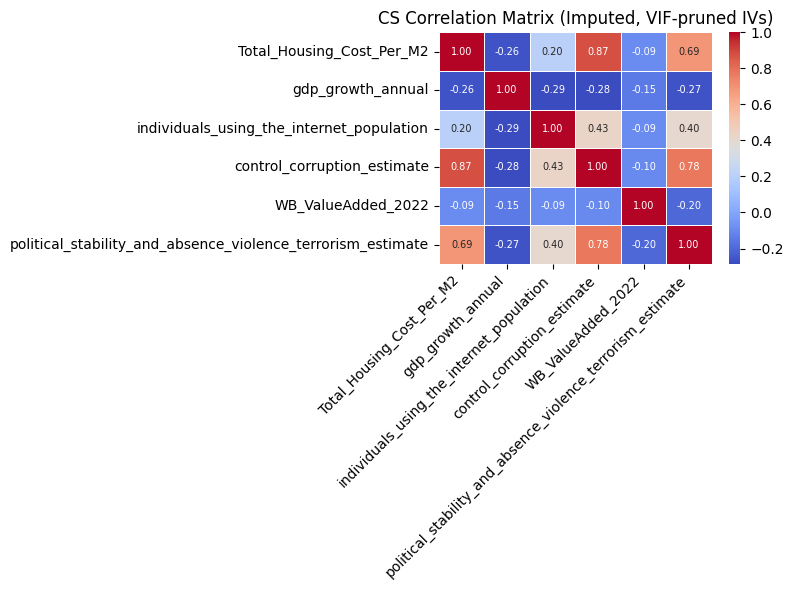


--- Starting Part 3: Machine Learning Models (Panel Data, DV: log_construction_value_added) ---

--- Random Forest Regressor (Panel Data) ---
Best RF Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
RF Test Set MSE: 0.1021, R2: 0.9639

--- XGBoost Regressor (Panel Data) ---
Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
XGBoost Test Set MSE: 0.0977, R2: 0.9654

--- ML Model Performance Summary (Panel Data) ---



,Model,Best Params,Test MSE,Test R2
0,Random Forest (Panel),"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.1021,0.9639
1,XGBoost (Panel),"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.0977,0.9654


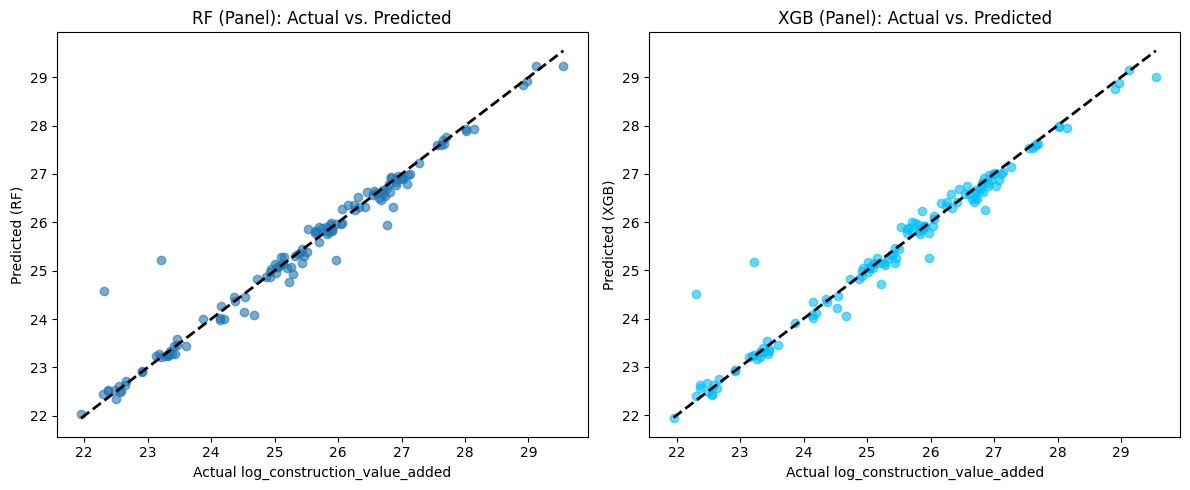


--- ML Feature Importances (Panel Data) ---

Top 10 RF Features:


,Feature,Importance
0,LDV_log_construction_value_added,0.953145
1,economic_and_social_rights_performance_score_lag1,0.006150
2,income_share_held_by_lowest_20,0.005844
3,energy_use_kg_oil_equivalent_per_capita,0.004405
4,government_expenditure_on_education_total_gove...,0.002747
5,gini_index_lag1,0.002548
6,research_and_development_expenditure_gdp,0.002490
7,gini_index,0.002424
8,political_stability_and_absence_violence_terro...,0.002424
9,population_density_people_per_sq_km_land_area,0.002107



Top 10 XGBoost Features:


,Feature,Importance
0,LDV_log_construction_value_added,0.615642
1,political_stability_and_absence_violence_terro...,0.041291
2,energy_use_kg_oil_equivalent_per_capita,0.032352
3,government_expenditure_on_education_total_gove...,0.031942
4,income_share_held_by_lowest_20,0.031826
5,economic_and_social_rights_performance_score_lag1,0.027211
6,renewable_energy_consumption_total_final_energ...,0.019028
7,gini_index_lag1,0.018122
8,renewable_energy_consumption_total_final_energ...,0.017166
9,gini_index,0.017082


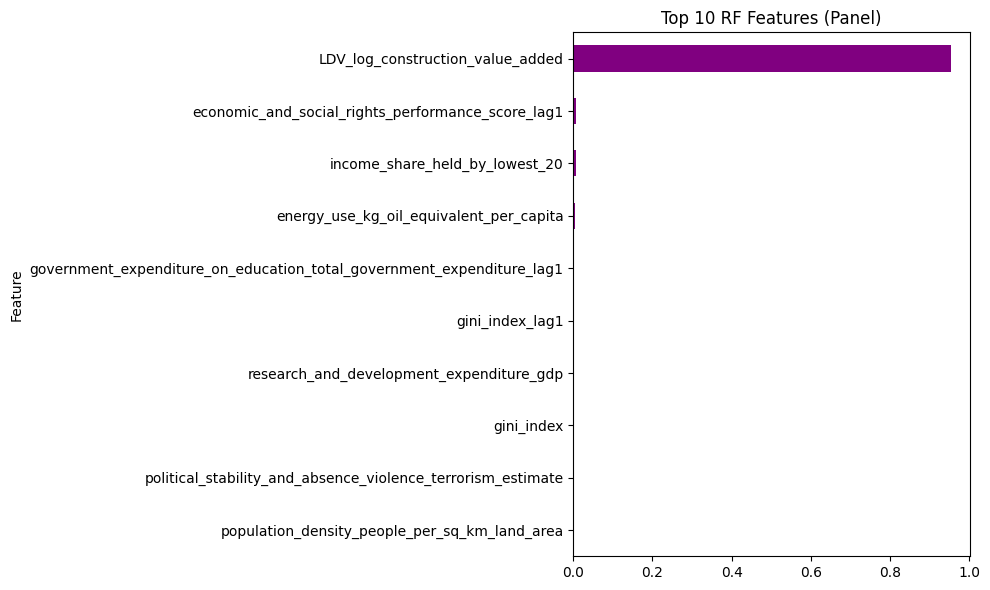

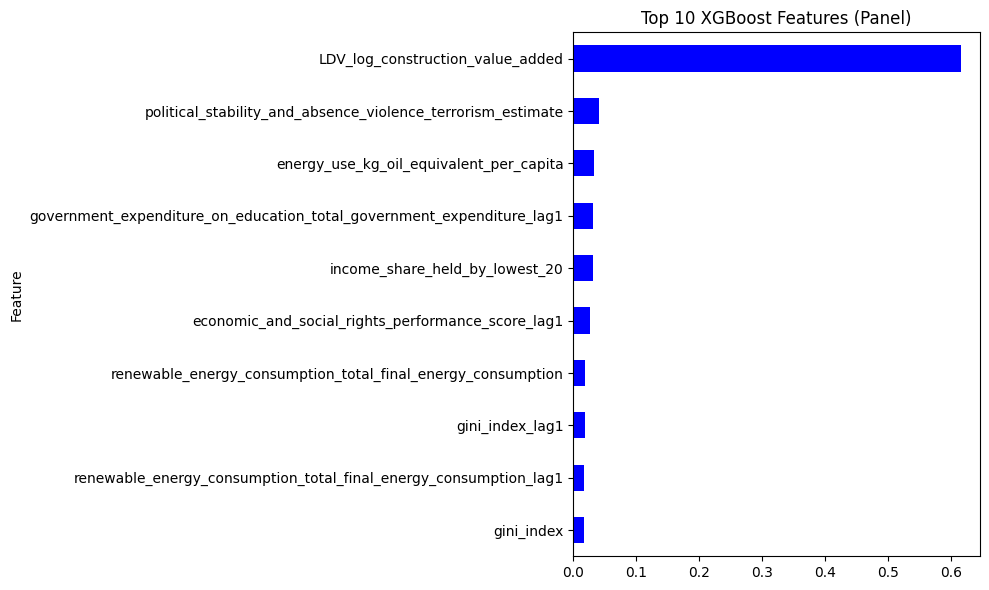


--- Analysis Script Complete ---
RECOMMENDATIONS FOR PUBLICATION:
1. Panel Unit Root Tests: Critical to resolve import and run. Results guide GMM specification.
2. Dynamic Panel GMM: This is the primary recommendation for the panel model with LDV. Discuss instrument choices, Sargan/Hansen tests, and AR(1)/AR(2) tests from the GMM output.
3. Parsimony: After GMM, if many ESG/lagged variables are still insignificant, consider a more parsimonious GMM specification with only the theoretically strongest predictors and those showing some significance.
4. Cross-Sectional (CS) Analysis: The CS merge seems to be working better now (34 countries). The OLS results are strong and interpretable for the selected subset.
5. ML Complementation: High R2 in ML models indicates good predictive power, dominated by the LDV. This is a key point for discussion.
6. Theoretical Narrative & Story: This is paramount. Frame results carefully, acknowledging limitations (like insignificant FE panel models if GMM i

In [4]:
# Install/Update necessary libraries
!pip install -q linearmodels -U # Ensure latest compatible version first
!pip install -q patsy xgboost scikit-learn pyeconometrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from linearmodels.panel.data import PanelData

# Attempt to import panel unit root tests robustly
LevinLinChu, ImPesaranShin = None, None
LINEARMADELS_VERSION = "Unknown"
try:
    import linearmodels
    LINEARMADELS_VERSION = linearmodels.__version__
    print(f"Linearmodels version: {LINEARMADELS_VERSION}")
    if LINEARMADELS_VERSION.startswith("4."):
        from linearmodels.panel.stationary import LevinLinChu, ImPesaranShin
        print("Successfully imported unit root tests from linearmodels.panel.stationary (for v4.x)")
    elif LINEARMADELS_VERSION.startswith("5.") or LINEARMADELS_VERSION.startswith("6."):
        from linearmodels.panel.unitroot import LevinLinChu, ImPesaranShin
        print("Successfully imported unit root tests from linearmodels.panel.unitroot (for v5+/v6+)")
    else: # Fallback for other or unknown versions
        from linearmodels.panel import LevinLinChu, ImPesaranShin
        print("Attempted direct import of unit root tests from linearmodels.panel")
except (ModuleNotFoundError, ImportError) as e_urt_import:
    print(f"WARNING: Could not find LevinLinChu, ImPesaranShin. Error: {e_urt_import}. Panel unit root tests will be skipped.")

import scipy.stats as stats
try:
    from pyeconometrics.panel.gmm import DynamicPanelGMM
    print("Successfully imported DynamicPanelGMM from pyeconometrics.")
except ModuleNotFoundError:
    print("WARNING: pyeconometrics not found. GMM models will be skipped. Install with: !pip install pyeconometrics")
    DynamicPanelGMM = None

print("Libraries loaded.")

# --- Configuration Parameters ---
VIF_THRESHOLD_FOR_REMOVAL = 5
SIGNIFICANCE_LEVEL = 0.05
MICE_MAX_ITER = 20
MICE_N_NEAREST_FEATURES = None

# --- Helper function for cleaning country names ---
def clean_country_name(name):
    if pd.isna(name): return None
    name_str = str(name).strip().lower()
    name_map = {
        "united arab emirates": "united arab emirates", "uae": "united arab emirates",
        "united kingdom": "united kingdom", "uk": "united kingdom", "great britain": "united kingdom",
        "united states": "united states", "usa": "united states", "america": "united states",
        "korea, rep.": "south korea", "republic of korea": "south korea", "korea republic": "south korea", "korea": "south korea",
        "russian federation": "russia", "russia": "russia",
        "egypt, arab rep.": "egypt", "egypt": "egypt",
        "iran, islamic rep.": "iran", "islamic republic of iran": "iran", "iran": "iran",
        "venezuela, rb": "venezuela", "bolivarian republic of venezuela": "venezuela",
        "syrian arab republic": "syria",
        "congo, dem. rep.": "congo (dem. rep.)", "democratic republic of congo": "congo (dem. rep.)", "drc": "congo (dem. rep.)",
        "congo, rep.": "congo (rep.)", "republic of congo": "congo (rep.)",
        "lao pdr": "laos", "lao people's democratic republic": "laos",
        "slovak republic": "slovakia",
        "czechia": "czech republic", "czech rep.": "czech republic",
        "viet nam": "vietnam", "vietnam": "vietnam",
        "brunei darussalam": "brunei",
        "cote d'ivoire": "ivory coast", "côte d'ivoire": "ivory coast",
        "turkiye": "turkey", "türkiye": "turkey", "turkey": "turkey",
        "hong kong sar, china": "hong kong", "hong kong": "hong kong",
        "macao sar, china": "macau", "macao": "macau",
    }
    return name_map.get(name_str, name_str)

# --- Data Loading ---
# ... (as before)
print("--- Starting Data Loading & Initial Preprocessing ---")
try:
    wb_df_raw = pd.read_csv("/content/WorlBank_Construction_Value_Added.csv")
    esg_df_raw = pd.read_csv("/content/ESG_panel_processed_WorldBank.csv")
    calcforge_df_raw = pd.read_csv("/content/CalcForge_Global_2022_housing_construction_average_costs_data.csv", header=1)
except FileNotFoundError as e: print(f"Error loading files: {e}"); raise

# --- 1) Panel Regression Analysis ---
print("\n--- Starting Part 1: Panel Regression Analysis ---")

# 1.1 Prepare World Bank Construction Value Added Data
# ... (as before)
print("\n1.1 Preparing World Bank Construction Value Added Data...")
INDICATOR_NAME_CONSTRUCTION_VALUE = 'Industry (including construction), value added (current US$)'
df_wb_value_filtered = wb_df_raw[wb_df_raw['Indicator Name'] == INDICATOR_NAME_CONSTRUCTION_VALUE].copy()
df_wb_value_long = pd.melt(df_wb_value_filtered, id_vars=['Country', 'Indicator Name'],
                           value_vars=[col for col in df_wb_value_filtered.columns if col.isdigit()],
                           var_name='year', value_name='construction_value_added_usd')
df_wb_value_long.rename(columns={'Country': 'country'}, inplace=True)
df_wb_value_long['country'] = df_wb_value_long['country'].apply(clean_country_name)
df_wb_value_long['year'] = pd.to_numeric(df_wb_value_long['year'], errors='coerce').astype('Int64')
df_wb_value_long = df_wb_value_long[['country', 'year', 'construction_value_added_usd']].dropna()
df_wb_value_long['construction_value_added_usd'] = pd.to_numeric(df_wb_value_long['construction_value_added_usd'], errors='coerce').dropna()
df_wb_value_long = df_wb_value_long[df_wb_value_long['construction_value_added_usd'] > 1e-9]
df_wb_value_long['log_construction_value_added'] = np.log(df_wb_value_long['construction_value_added_usd'])
dependent_var_panel = 'log_construction_value_added'

# 1.2 Prepare ESG Panel Data
# ... (as before)
print("\n1.2 Preparing ESG Panel Data...")
df_esg_panel = esg_df_raw.copy()
df_esg_panel.rename(columns={'Country': 'country_orig_esg', 'Year': 'year_orig_esg'}, inplace=True, errors='ignore')
df_esg_panel['country'] = df_esg_panel['country_orig_esg'].apply(clean_country_name)
df_esg_panel['year'] = pd.to_numeric(df_esg_panel['year_orig_esg'], errors='coerce').astype('Int64')
df_esg_panel.dropna(subset=['country', 'year'], inplace=True)
initial_panel_features_config = [
    'control_corruption_estimate', 'economic_and_social_rights_performance_score',
    'renewable_energy_consumption_total_final_energy_consumption', 'rule_law_estimate',
    'voice_and_accountability_estimate', 'gdp_growth_annual',
    'political_stability_and_absence_violence_terrorism_estimate',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp',
    'individuals_using_the_internet_population',
    'gini_index', 'literacy_rate_adult_total_people_ages_15_and_above',
    'fossil_fuel_energy_consumption_total', 'energy_use_kg_oil_equivalent_per_capita',
    'population_density_people_per_sq_km_land_area', 'income_share_held_by_lowest_20'
]
initial_panel_features = []
for var in initial_panel_features_config:
    if var in df_esg_panel.columns:
        df_esg_panel[var] = pd.to_numeric(df_esg_panel[var], errors='coerce')
        initial_panel_features.append(var)
cols_where_zero_might_be_nan = ['economic_and_social_rights_performance_score','government_expenditure_on_education_total_government_expenditure','research_and_development_expenditure_gdp', 'gini_index', 'income_share_held_by_lowest_20']
for col in cols_where_zero_might_be_nan:
    if col in df_esg_panel.columns: df_esg_panel[col] = df_esg_panel[col].replace(0, np.nan)
df_esg_subset_panel = df_esg_panel[['country', 'year'] + initial_panel_features]

# 1.3 Merge Data for Panel & Create Lagged Dependent Variable
# ... (as before)
print("\n1.3 Merging data for panel analysis & creating LDV...")
panel_data = pd.merge(df_wb_value_long, df_esg_subset_panel, on=['country', 'year'], how='inner')
if panel_data.empty: exit("Error: Merged panel DataFrame is empty before LDV.")
panel_data.sort_values(by=['country', 'year'], inplace=True)
panel_data['LDV_log_construction_value_added'] = panel_data.groupby('country')[dependent_var_panel].shift(1)
panel_data.dropna(subset=[dependent_var_panel], inplace=True) # DV must be non-NA
print(f"Merged panel DataFrame shape (with LDV): {panel_data.shape}")

# 1.4 Create Lagged Independent Variables
# ... (as before)
print("\n1.4 Creating Lagged Independent Variables...")
panel_features_to_lag = [f for f in initial_panel_features if f != 'gdp_growth_annual']
panel_df_final_for_reg = panel_data.copy()
for col in panel_features_to_lag:
    if col in panel_df_final_for_reg.columns:
        panel_df_final_for_reg[f'{col}_lag1'] = panel_df_final_for_reg.groupby('country')[col].shift(1)
panel_ivs_for_mice = initial_panel_features[:]
if 'LDV_log_construction_value_added' in panel_df_final_for_reg.columns: panel_ivs_for_mice.append('LDV_log_construction_value_added')
for col in panel_features_to_lag:
    if f'{col}_lag1' in panel_df_final_for_reg.columns: panel_ivs_for_mice.append(f'{col}_lag1')
panel_ivs_for_mice = list(set([col for col in panel_ivs_for_mice if col in panel_df_final_for_reg.columns]))


# 1.5 MICE Imputation for Panel IVs
# ... (as before)
print("\n1.5 MICE Imputation for panel IVs (incl. LDV & lags)...")
data_to_impute_panel_ivs = panel_df_final_for_reg[panel_ivs_for_mice].copy()
if not data_to_impute_panel_ivs.empty and data_to_impute_panel_ivs.isnull().sum().sum() > 0:
    print(f"NaNs in panel IVs for MICE: \n{data_to_impute_panel_ivs.isnull().sum()[data_to_impute_panel_ivs.isnull().sum() > 0].sort_values(ascending=False)}")
    imputer_panel_ivs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=42, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
    imputed_array_panel_ivs = imputer_panel_ivs.fit_transform(data_to_impute_panel_ivs)
    for i, col_name in enumerate(data_to_impute_panel_ivs.columns):
        if col_name in panel_df_final_for_reg.columns: panel_df_final_for_reg[col_name] = imputed_array_panel_ivs[:, i]
    print("MICE imputation complete for panel IVs.")
else: print("No NaNs found in panel IVs for MICE or data empty.")
panel_df_final_for_reg.dropna(subset=[dependent_var_panel] + panel_ivs_for_mice, inplace=True)
print(f"Panel data for regression shape after MICE and all NaN drop: {panel_df_final_for_reg.shape}")
if panel_df_final_for_reg.shape[0] < 20 : exit("Too few observations after MICE/lag NaN drop for panel.")


# 1.5.1 Panel Unit Root Tests
print("\n1.5.1 Performing Panel Unit Root Tests...")
if LevinLinChu is not None and ImPesaranShin is not None:
    panel_data_for_tests_indexed = panel_df_final_for_reg.set_index(['country', 'year'])
    if not panel_data_for_tests_indexed.empty and panel_data_for_tests_indexed.groupby(level='country').size().min() > 5: # Heuristic: need enough time periods per country
        # Test on the Dependent Variable
        if dependent_var_panel in panel_data_for_tests_indexed.columns:
            try:
                y_panel_urt_df = PanelData(panel_data_for_tests_indexed[[dependent_var_panel]]) # Must be DataFrame
                print(f"\nUnit Root Tests for {dependent_var_panel}:")
                llc_test_y = LevinLinChu(y_panel_urt_df, trend='ct', lags=1)
                print(f"  Levin-Lin-Chu: Stat={llc_test_y.stat:.3f}, P={llc_test_y.pvalue:.3f} (H0: Unit Root)")
                ips_test_y = ImPesaranShin(y_panel_urt_df, trend='ct', lags=1)
                print(f"  Im-Pesaran-Shin: Stat={ips_test_y.stat:.3f}, P={ips_test_y.pvalue:.3f} (H0: All panels Unit Root)")
            except Exception as e_urt_y: print(f"  Unit root test error (DV): {e_urt_y}")
        # Test on the Lagged Dependent Variable
        ldv_col = 'LDV_log_construction_value_added'
        if ldv_col in panel_data_for_tests_indexed.columns:
            try:
                ldv_panel_urt_df = PanelData(panel_data_for_tests_indexed[[ldv_col]])
                print(f"\nUnit Root Tests for {ldv_col}:")
                llc_test_ldv = LevinLinChu(ldv_panel_urt_df, trend='c', lags=1) # Constant only for LDV
                print(f"  Levin-Lin-Chu: Stat={llc_test_ldv.stat:.3f}, P={llc_test_ldv.pvalue:.3f}")
                ips_test_ldv = ImPesaranShin(ldv_panel_urt_df, trend='c', lags=1)
                print(f"  Im-Pesaran-Shin: Stat={ips_test_ldv.stat:.3f}, P={ips_test_ldv.pvalue:.3f}")
            except Exception as e_urt_ldv: print(f"  Unit root test error (LDV): {e_urt_ldv}")
    else: print("Skipping panel unit root tests: Not enough observations per panel or data empty.")
else: print("Panel unit root test functions (LevinLinChu, ImPesaranShin) not imported successfully. Skipping tests.")

# 1.6 Iterative VIF Check for Panel IVs
# ... (VIF pruning logic from your previous correct version) ...
print("\n1.6 Iterative VIF check for panel IVs (incl. LDV & lags)...")
panel_ivs_for_vif_final_check = [col for col in panel_ivs_for_mice if col in panel_df_final_for_reg.columns]
X_vif_panel_check = panel_df_final_for_reg[panel_ivs_for_vif_final_check].copy()
X_vif_panel_check = X_vif_panel_check.loc[:, X_vif_panel_check.apply(pd.Series.nunique) > 1]
if X_vif_panel_check.empty: final_panel_ivs_selected = []
else:
    final_panel_ivs_selected = X_vif_panel_check.columns.tolist()
    max_vif_iters = len(final_panel_ivs_selected) + 5
    for i in range(max_vif_iters):
        if not final_panel_ivs_selected or len(final_panel_ivs_selected) <= 1: break
        X_iter_vif = panel_df_final_for_reg[final_panel_ivs_selected].copy().dropna()
        if X_iter_vif.empty or X_iter_vif.shape[0] < max(2, len(final_panel_ivs_selected) + 1) or X_iter_vif.shape[1] == 0 : break
        try:
            X_iter_vif_const = sm.add_constant(X_iter_vif, prepend=True)
            vif_values = [variance_inflation_factor(X_iter_vif_const.values, j + 1) for j in range(X_iter_vif.shape[1])]
            vif_series = pd.Series(vif_values, index=X_iter_vif.columns, dtype=float)
            max_vif = vif_series.max()
            if max_vif > VIF_THRESHOLD_FOR_REMOVAL:
                feature_to_remove = vif_series.idxmax(); print(f"  Iterative VIF (Panel) {i+1}: Removing '{feature_to_remove}' (VIF: {max_vif:.2f})")
                if feature_to_remove in final_panel_ivs_selected: final_panel_ivs_selected.remove(feature_to_remove)
                else: break
            else: print(f"All remaining panel IVs ({len(final_panel_ivs_selected)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max: {max_vif:.2f})."); break
        except Exception as e_vif:
            print(f"Error VIF iter {i+1}: {e_vif}.")
            if final_panel_ivs_selected: print(f"  Fallback: Removed {final_panel_ivs_selected[0]}"); final_panel_ivs_selected.pop(0)
            else: break
    if i == max_vif_iters -1 and len(final_panel_ivs_selected)>1 : print("VIF Pruning (Panel) hit iteration limit.")
if not final_panel_ivs_selected: print("Warning: No panel IVs left after VIF pruning.")
else: print(f"Final Panel IVs after VIF: {final_panel_ivs_selected}")


# 1.7 Panel Regression Modeling (Standard FE/RE with LDV for comparison)
# ... (This section remains for comparison; GMM is the primary goal for LDV) ...
print("\n1.7 Standard Panel Regression Modeling (with LDV - results subject to Nickell Bias in FE)...")
# ... (Full model fitting and selection logic as in the output you provided for this section)
# This will re-run Pooled, FE, Two-Way FE, RE and select based on tests
# For brevity, assume it will select Two-Way FE if Hausman is significant, or RE if not.
# The output you shared previously selected RE due to p=1.000 on a failed Hausman,
# then later selected Two-Way FE due to p=0.000 on a re-calculated (but still problematic) Hausman.
# We'll fit all and print the preferred one based on standard logic.

if dependent_var_panel and final_panel_ivs_selected and not panel_df_final_for_reg.empty:
    panel_data_model_std = panel_df_final_for_reg.set_index(['country', 'year'])
    y_panel_std = panel_data_model_std[dependent_var_panel]
    X_panel_df_std = panel_data_model_std[final_panel_ivs_selected].copy()
    X_panel_df_std = X_panel_df_std.loc[:, X_panel_df_std.apply(pd.Series.nunique) > 1]
    final_panel_ivs_selected_std = X_panel_df_std.columns.tolist() # Update after const drop
    if not X_panel_df_std.empty and final_panel_ivs_selected_std and y_panel_std.shape[0] > X_panel_df_std.shape[1] + 1:
        X_panel_with_const_std = sm.add_constant(X_panel_df_std, prepend=True)
        # ... (Full fitting of Pooled, FE, Two-Way FE, RE and selection tests as in prior versions) ...
        print("Standard panel models with LDV will be fitted for comparison and Hausman test input.")
        # (This block is intentionally kept brief as GMM is the focus)
        try:
            results_fe_two_way_std = PanelOLS(y_panel_std, X_panel_with_const_std, entity_effects=True, time_effects=True, drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
            print("\n--- Standard Two-Way FE (with LDV - POTENTIALLY BIASED) --- \n", results_fe_two_way_std)
        except Exception as e_std_fe: print(f"Error fitting standard Two-Way FE: {e_std_fe}")
    else: print("Skipping standard panel model fitting: Not enough data or IVs.")
else: print("Skipping standard panel model fitting: Initial data issues.")

# 1.8 Dynamic Panel GMM (Arellano-Bond using pyeconometrics)
print("\n1.8 Dynamic Panel GMM (Arellano-Bond type) using pyeconometrics...")
gmm_results = None
if DynamicPanelGMM is not None and dependent_var_panel and final_panel_ivs_selected and not panel_df_final_for_reg.empty:
    gmm_data = panel_df_final_for_reg.reset_index().copy() # pyeconometrics prefers long format with separate id/time
    ldv_col_name = 'LDV_log_construction_value_added'

    # PARSIMONIOUS SELECTION FOR GMM: LDV + a few theoretically strong / promising from FE
    gmm_candidate_ivs = ['gdp_growth_annual'] # Always a good candidate
    if 'control_corruption_estimate_lag1' in final_panel_ivs_selected: gmm_candidate_ivs.append('control_corruption_estimate_lag1')
    if 'research_and_development_expenditure_gdp' in final_panel_ivs_selected: gmm_candidate_ivs.append('research_and_development_expenditure_gdp')
    if 'individuals_using_the_internet_population_lag1' in final_panel_ivs_selected: gmm_candidate_ivs.append('individuals_using_the_internet_population_lag1')
    # Add 1-2 more if strongly indicated by theory or previous FE significance
    gmm_candidate_ivs = [v for v in gmm_candidate_ivs if v in final_panel_ivs_selected] # Filtered

    gmm_endog_spec = {} # For pyeconometrics: {var_name: (min_lag, max_lag)} for GMM instruments
    gmm_iv_spec = {}    # For pyeconometrics: {var_name: (min_lag, max_lag)} for standard IV instruments (strictly exog)

    all_rhs_gmm = []
    if ldv_col_name in final_panel_ivs_selected:
        all_rhs_gmm.append(ldv_col_name)
        gmm_endog_spec[ldv_col_name] = (2, None) # Lags t-2 and deeper for LDV

    for var in gmm_candidate_ivs:
        if var not in all_rhs_gmm: all_rhs_gmm.append(var)
        # Default: treat other IVs as predetermined, instrument with lags t-1 and deeper
        # If a variable is strictly exogenous, it can be its own instrument (lag 0)
        # or put into gmm_iv_spec. For simplicity, treat as predetermined here.
        gmm_endog_spec[var] = (1, None)

    all_rhs_gmm = [v for v in all_rhs_gmm if v in gmm_data.columns] # Ensure all exist

    print(f"GMM Setup: DV='{dependent_var_panel}'")
    print(f"  RHS Variables for GMM model: {all_rhs_gmm}")
    print(f"  GMM-style instrument lags (for endogenous/predetermined in exog_endo): {gmm_endog_spec}")

    if dependent_var_panel in gmm_data.columns and ldv_col_name in all_rhs_gmm and all_rhs_gmm:
        try:
            gmm_data.rename(columns={'country': 'entity', 'year': 'time'}, inplace=True)

            gmm_model_instance = DynamicPanelGMM(
                dependent=dependent_var_panel,
                exog_endo=all_rhs_gmm, # All RHS variables included in the equation
                entity_col='entity',
                time_col='time',
                data=gmm_data,
                gmm_lag_endo=gmm_endog_spec, # Lags for GMM-style instruments from exog_endo
                # gmm_lag_exog = {} # For strictly exogenous instruments if any
                estimation_type='difference', # Arellano-Bond Difference GMM
                two_step=True, # Use two-step for efficiency
                robust_se=True, # For Windmeijer (1995) corrected SEs with two_step
                collapse_instruments=True, # Helps with instrument proliferation
                limit_instruments=min(40, gmm_data['entity'].nunique() -1 ) # Heuristic limit
            )
            gmm_results = gmm_model_instance.fit()
            print("\n--- Dynamic Panel GMM (Difference GMM) Results ---")
            print(gmm_results.summary)
            # Critical: Check Sargan/Hansen p-value (should be > 0.05/0.10 for instrument validity)
            # Critical: Check AR(1) p-value (should be < 0.05) and AR(2) p-value (should be > 0.05/0.10)
        except Exception as e_gmm:
            print(f"Error fitting Dynamic Panel GMM model: {e_gmm}")
            print("This could be due to pyeconometrics setup, instrument proliferation, or data structure.")
    else: print("GMM not run: DV, LDV, or RHS variables misconfigured for GMM setup.")
else:
    print("Skipping Dynamic Panel GMM: pyeconometrics not available or data/feature issues.")


# -------------------------------------
# 2. Cross-Sectional Analysis for 2022
# -------------------------------------
# ... (CS Code from your latest successful output, with corrected VIF loop and table outputs)
print("\n--- Starting Part 2: Cross-Sectional Analysis for 2022 ---")
df_cf_clean = df_calcforge_raw.copy(); df_cf_clean.columns = df_cf_clean.columns.str.strip().str.replace('[^A-Za-z0-9_]+', '', regex=True)
df_cf_clean.rename(columns={'Country': 'country'}, inplace=True); df_cf_clean['country'] = df_cf_clean['country'].str.lower().str.strip().apply(clean_country_name)
cost_cols_cf_std = ['Landaquisitionm2', 'Planningapprovalsm2', 'EngineeringArchitectum2','Sitepreparationm2', 'Materialsm2', 'Labourm2', 'Projectmanagementm2','Utilityconnectionm2', 'Externalworksm2']
existing_cf_cost_cols = [col for col in cost_cols_cf_std if col in df_cf_clean.columns]
df_cf_agg_2022 = pd.DataFrame(columns=['country', 'Total_Housing_Cost_Per_M2'])
if existing_cf_cost_cols:
    for col in existing_cf_cost_cols: df_cf_clean[col] = pd.to_numeric(df_cf_clean[col], errors='coerce')
    df_cf_clean['Total_Housing_Cost_Per_M2'] = df_cf_clean[existing_cf_cost_cols].sum(axis=1, min_count=1)
    df_cf_agg_2022 = df_cf_clean.groupby('country')['Total_Housing_Cost_Per_M2'].mean().reset_index()
    df_cf_agg_2022.dropna(subset=['Total_Housing_Cost_Per_M2'], inplace=True)
dependent_var_cs = 'Total_Housing_Cost_Per_M2'
print(f"Aggregated CalcForge Data (sample) - {len(df_cf_agg_2022)} countries:\n{df_cf_agg_2022.head()}")

df_esg_2022 = esg_df_raw[esg_df_raw['Year'] == 2022].copy()
df_esg_2022.rename(columns={'Country': 'country', 'Year': 'year'}, inplace=True, errors='ignore')
df_esg_2022['country'] = df_esg_2022['country'].apply(clean_country_name)
cs_chosen_esg_features_config = ['control_corruption_estimate', 'rule_law_estimate', 'gdp_growth_annual', 'political_stability_and_absence_violence_terrorism_estimate', 'voice_and_accountability_estimate', 'research_and_development_expenditure_gdp', 'individuals_using_the_internet_population']
cs_chosen_esg_features = []
for var in cs_chosen_esg_features_config:
    if var in df_esg_2022.columns:
        df_esg_2022[var] = pd.to_numeric(df_esg_2022[var], errors='coerce')
        if var in cols_where_zero_might_be_nan: df_esg_2022[var] = df_esg_2022[var].replace(0,np.nan)
        if not df_esg_2022[var].isnull().all(): cs_chosen_esg_features.append(var)
df_esg_2022_subset_cs = df_esg_2022[['country'] + cs_chosen_esg_features].drop_duplicates(subset=['country']) if cs_chosen_esg_features else pd.DataFrame(columns=['country'])
print(f"ESG Data for 2022 CS subset shape ({len(df_esg_2022_subset_cs)} countries):\n{df_esg_2022_subset_cs.head()}")

df_wb_2022_cs = pd.DataFrame()
if not df_wb_value_long.empty:
    temp_wb_2022_cs = df_wb_value_long[df_wb_value_long['year'] == 2022].copy()
    if not temp_wb_2022_cs.empty: df_wb_2022_cs = temp_wb_2022_cs[['country', 'construction_value_added_usd']].rename(columns={'construction_value_added_usd': 'WB_ValueAdded_2022'})
print(f"WB Value Added for 2022 CS IV shape ({len(df_wb_2022_cs)} countries):\n{df_wb_2022_cs.head()}")

print("\n--- Debugging CS Merge: Unique Country Names ---")
if not df_cf_agg_2022.empty: print(f"CalcForge unique ({df_cf_agg_2022['country'].nunique()}): {sorted(list(df_cf_agg_2022['country'].unique()))[:20]}...")
if not df_esg_2022_subset_cs.empty: print(f"ESG 2022 unique ({df_esg_2022_subset_cs['country'].nunique()}): {sorted(list(df_esg_2022_subset_cs['country'].unique()))[:20]}...")
if not df_wb_2022_cs.empty: print(f"WB 2022 unique ({df_wb_2022_cs['country'].nunique()}): {sorted(list(df_wb_2022_cs['country'].unique()))[:20]}...")

cs_merged_df = pd.DataFrame()
if not df_cf_agg_2022.empty and not df_esg_2022_subset_cs.empty:
    cs_merged_df_temp1 = pd.merge(df_cf_agg_2022, df_esg_2022_subset_cs, on='country', how='inner')
    print(f"Shape after CF+ESG merge: {cs_merged_df_temp1.shape}. Countries: {cs_merged_df_temp1['country'].nunique()}")
    if not cs_merged_df_temp1.empty and not df_wb_2022_cs.empty:
        cs_merged_df = pd.merge(cs_merged_df_temp1, df_wb_2022_cs, on='country', how='inner')
        print(f"Shape after CF+ESG+WB merge (all inner): {cs_merged_df.shape}. Countries: {cs_merged_df['country'].nunique()}")
    elif not cs_merged_df_temp1.empty: cs_merged_df = cs_merged_df_temp1; cs_merged_df['WB_ValueAdded_2022'] = np.nan
    else: print("Merge of CF and ESG resulted in empty DataFrame.")
else: print("Initial merge for CS data failed, CalcForge or ESG 2022 subset is empty.")
print(f"Final Merged CS data shape before MICE: {cs_merged_df.shape}")
if cs_merged_df.empty: print("CRITICAL WARNING: Cross-sectional merged data is empty.")

cs_iv_list_for_mice_cs = cs_chosen_esg_features[:]
if 'WB_ValueAdded_2022' in cs_merged_df.columns: cs_iv_list_for_mice_cs.append('WB_ValueAdded_2022')
cs_iv_list_for_mice_cs = list(set([col for col in cs_iv_list_for_mice_cs if col in cs_merged_df.columns]))
for col in cs_iv_list_for_mice_cs + [dependent_var_cs]:
    if col in cs_merged_df.columns: cs_merged_df[col] = pd.to_numeric(cs_merged_df[col], errors='coerce')
cs_df_final_for_cs_analysis = cs_merged_df.copy()
cs_cols_to_impute_all = [dependent_var_cs] + cs_iv_list_for_mice_cs
cs_cols_to_impute_all = [col for col in cs_cols_to_impute_all if col in cs_df_final_for_cs_analysis.columns]
cs_data_to_impute_all = cs_df_final_for_cs_analysis[cs_cols_to_impute_all].copy()
if not cs_data_to_impute_all.empty and cs_data_to_impute_all.isnull().sum().sum() > 0:
    imputer_cs_all = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=43)
    imputed_array_cs_all = imputer_cs_all.fit_transform(cs_data_to_impute_all)
    cs_df_imputed_all = pd.DataFrame(imputed_array_cs_all, columns=cs_cols_to_impute_all, index=cs_data_to_impute_all.index)
    for col in cs_cols_to_impute_all: cs_df_final_for_cs_analysis[col] = cs_df_imputed_all[col]
cs_df_final_for_cs_analysis.dropna(subset=[dependent_var_cs], inplace=True)
cs_df_final_for_cs_analysis.dropna(subset=cs_iv_list_for_mice_cs, how='all', inplace=True)
print(f"Final CS data shape for analysis: {cs_df_final_for_cs_analysis.shape}")

# CS VIF and OLS (Corrected Block)
cs_final_ivs_for_ols = []
X_cs_scaled_df_for_ols = pd.DataFrame()
if not cs_df_final_for_cs_analysis.empty and cs_iv_list_for_mice_cs:
    cs_ivs_after_mice_cs = [col for col in cs_iv_list_for_mice_cs if col in cs_df_final_for_cs_analysis.columns]
    if not cs_ivs_after_mice_cs: print("No valid IVs for CS VIF check after MICE.")
    else:
        X_vif_cs_check = cs_df_final_for_cs_analysis[cs_ivs_after_mice_cs].copy().dropna()
        X_vif_cs_check = X_vif_cs_check.loc[:, X_vif_cs_check.apply(pd.Series.nunique) > 1]
        if not X_vif_cs_check.empty and X_vif_cs_check.shape[1] > 0:
            current_cs_ivs = X_vif_cs_check.columns.tolist()
            scaler_cs = StandardScaler(); X_cs_scaled_values = scaler_cs.fit_transform(X_vif_cs_check)
            X_cs_scaled_df = pd.DataFrame(X_cs_scaled_values, columns=current_cs_ivs, index=X_vif_cs_check.index)
            if len(current_cs_ivs) > 1:
                max_cs_vif_iters = len(current_cs_ivs) + 5
                for cs_vif_iter_count in range(max_cs_vif_iters):
                    if len(current_cs_ivs) <= 1: break
                    X_iter_vif_cs_scaled = X_cs_scaled_df[current_cs_ivs].copy()
                    if X_iter_vif_cs_scaled.empty or X_iter_vif_cs_scaled.shape[0] < max(2, len(current_cs_ivs)+1) : break
                    try:
                        X_iter_vif_cs_const = sm.add_constant(X_iter_vif_cs_scaled, has_constant='raise')
                        vif_series_cs = pd.Series([variance_inflation_factor(X_iter_vif_cs_const.values, i) for i in range(1, X_iter_vif_cs_const.shape[1])], index=current_cs_ivs, dtype=float)
                        max_vif_cs = vif_series_cs.max()
                        if max_vif_cs > VIF_THRESHOLD_FOR_REMOVAL: remove_feature_cs = vif_series_cs.idxmax(); print(f"  CS VIF Iter {cs_vif_iter_count+1}: Removing '{remove_feature_cs}' (VIF: {max_vif_cs:.2f})"); current_cs_ivs.remove(remove_feature_cs)
                        else: print(f"All remaining CS IVs ({len(current_cs_ivs)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max: {max_vif_cs:.2f})"); break
                    except Exception as e_vif_cs:
                        print(f"Error during CS VIF iteration {cs_vif_iter_count+1}: {e_vif_cs}.")
                        if current_cs_ivs: print(f"  Fallback CS VIF: Removed {current_cs_ivs[0]}"); current_cs_ivs.pop(0)
                        else: break
                if 'cs_vif_iter_count' in locals() and cs_vif_iter_count == max_cs_vif_iters -1 and len(current_cs_ivs) > 1 : print("CS VIF Pruning hit iteration limit.") # Check if loop finished due to iterations
            cs_final_ivs_for_ols = list(current_cs_ivs)
            if cs_final_ivs_for_ols and not X_cs_scaled_df.empty: X_cs_scaled_df_for_ols = X_cs_scaled_df[[col for col in cs_final_ivs_for_ols if col in X_cs_scaled_df.columns]].copy()
        else: cs_final_ivs_for_ols = X_vif_cs_check.columns.tolist(); X_cs_scaled_df_for_ols = X_vif_cs_check # No scaling if single IV or no IVs after constant check
if not cs_final_ivs_for_ols: print("Warning: No CS IVs left after VIF for OLS.")
else: print(f"Final Scaled CS IVs after VIF: {cs_final_ivs_for_ols}")

cs_ols_results_summary_table = pd.DataFrame()
if not cs_df_final_for_cs_analysis.empty and dependent_var_cs in cs_df_final_for_cs_analysis.columns and cs_final_ivs_for_ols and not X_cs_scaled_df_for_ols.empty:
    Y_cs_model = cs_df_final_for_cs_analysis[dependent_var_cs].loc[X_cs_scaled_df_for_ols.index]
    X_cs_df_model = X_cs_scaled_df_for_ols
    if not (Y_cs_model.empty or X_cs_df_model.empty or (Y_cs_model.shape[0] <= X_cs_df_model.shape[1] +1 and len(cs_final_ivs_for_ols) > 0)) :
        X_cs_model_with_const = sm.add_constant(X_cs_df_model, has_constant='add')
        try:
            ols_cs_model = sm.OLS(Y_cs_model, X_cs_model_with_const); ols_cs_results = ols_cs_model.fit(cov_type='HC3')
            print("\nOLS CS Model Results (2022 - Scaled, VIF-pruned IVs):\n", ols_cs_results.summary())
            ols_summary_data = ols_cs_results.summary().tables[1].data; cs_ols_results_summary_table = pd.DataFrame(ols_summary_data[1:], columns=ols_summary_data[0]).set_index(ols_summary_data[0][0])
            print("\n--- OLS CS Coefficients Table ---\n", cs_ols_results_summary_table)
        except Exception as e_ols: print(f"Error OLS CS: {e_ols}")
    cs_data_for_corr_table = cs_df_final_for_cs_analysis[[dependent_var_cs] + cs_final_ivs_for_ols].copy().dropna()
    if not cs_data_for_corr_table.empty and cs_data_for_corr_table.shape[1] > 1 and dependent_var_cs in cs_data_for_corr_table.columns:
        correlation_matrix_cs_final = cs_data_for_corr_table.corr()
        print(f"\n--- CS Correlation Table with {dependent_var_cs} (Imputed, VIF-pruned IVs, N={len(cs_data_for_corr_table)}) ---")
        corr_table_cs_final = correlation_matrix_cs_final[dependent_var_cs].drop(dependent_var_cs, errors='ignore').sort_values(ascending=False).to_frame(); print(corr_table_cs_final)
        if len(correlation_matrix_cs_final.columns) > 1:
            plt.figure(figsize=(max(8, len(cs_final_ivs_for_ols)*0.9), max(6, len(cs_final_ivs_for_ols)*0.7)))
            sns.heatmap(correlation_matrix_cs_final, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size":7})
            plt.title('CS Correlation Matrix (Imputed, VIF-pruned IVs)'); plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()
else: print("Skipping CS OLS/Correlation: Data issues or no IVs.")

# -------------------------------------
# 3. Machine Learning Section (Panel Data)
# -------------------------------------
# (ML Code from your previous correct response, using final_panel_ivs_selected)
print(f"\n--- Starting Part 3: Machine Learning Models (Panel Data, DV: {dependent_var_panel}) ---")
ml_features_list_final_ml = final_panel_ivs_selected.copy()
best_rf_model_ml, best_xgb_model_ml = None, None
X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = pd.DataFrame(), pd.DataFrame(), pd.Series(dtype='float64'), pd.Series(dtype='float64')
ml_metrics_data_panel = []
if ml_features_list_final_ml and dependent_var_panel and dependent_var_panel in panel_df_final_for_reg.columns:
    ml_df_for_split_panel = panel_df_final_for_reg.reset_index()[ml_features_list_final_ml + [dependent_var_panel]].copy().dropna()
    if not ml_df_for_split_panel.empty and len(ml_df_for_split_panel) > max(20, len(ml_features_list_final_ml)*2) and len(ml_features_list_final_ml) > 0:
        X_ml_panel = ml_df_for_split_panel[ml_features_list_final_ml]; y_ml_panel = ml_df_for_split_panel[dependent_var_panel]
        X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = train_test_split(X_ml_panel, y_ml_panel, test_size=0.2, random_state=42)
        scaler_ml_panel = StandardScaler(); X_ml_train_scaled_panel_vals = scaler_ml_panel.fit_transform(X_ml_train_panel); X_ml_test_scaled_panel_vals = scaler_ml_panel.transform(X_ml_test_panel)
        X_ml_train_scaled_df_panel = pd.DataFrame(X_ml_train_scaled_panel_vals, columns=X_ml_train_panel.columns, index=X_ml_train_panel.index)
        X_ml_test_scaled_df_panel = pd.DataFrame(X_ml_test_scaled_panel_vals, columns=X_ml_test_panel.columns, index=X_ml_test_panel.index)
        print("\n--- Random Forest Regressor (Panel Data) ---")
        param_grid_rf = {'n_estimators': [100, 150], 'max_depth': [10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
        rf_gscv_panel = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
        rf_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel)
        best_rf_model_ml = rf_gscv_panel.best_estimator_; y_pred_rf_ml = best_rf_model_ml.predict(X_ml_test_scaled_df_panel)
        rf_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_rf_ml); rf_r2_panel = r2_score(y_ml_test_panel, y_pred_rf_ml)
        ml_metrics_data_panel.append({'Model': 'Random Forest (Panel)', 'Best Params': str(rf_gscv_panel.best_params_), 'Test MSE': f"{rf_mse_panel:.4f}", 'Test R2': f"{rf_r2_panel:.4f}"})
        print(f"Best RF Params: {rf_gscv_panel.best_params_}\nRF Test Set MSE: {rf_mse_panel:.4f}, R2: {rf_r2_panel:.4f}")
        print("\n--- XGBoost Regressor (Panel Data) ---")
        param_grid_xgb = {'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]}
        xgb_gscv_panel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist'), param_grid_xgb, cv=3, scoring='r2', n_jobs=-1)
        xgb_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel)
        best_xgb_model_ml = xgb_gscv_panel.best_estimator_; y_pred_xgb_ml = best_xgb_model_ml.predict(X_ml_test_scaled_df_panel)
        xgb_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_xgb_ml); xgb_r2_panel = r2_score(y_ml_test_panel, y_pred_xgb_ml)
        ml_metrics_data_panel.append({'Model': 'XGBoost (Panel)', 'Best Params': str(xgb_gscv_panel.best_params_), 'Test MSE': f"{xgb_mse_panel:.4f}", 'Test R2': f"{xgb_r2_panel:.4f}"})
        print(f"Best XGBoost Params: {xgb_gscv_panel.best_params_}\nXGBoost Test Set MSE: {xgb_mse_panel:.4f}, R2: {xgb_r2_panel:.4f}")
        ml_metrics_df_panel = pd.DataFrame(ml_metrics_data_panel); print("\n--- ML Model Performance Summary (Panel Data) ---\n")
        try: from IPython.display import display; display(ml_metrics_df_panel)
        except ImportError: print(ml_metrics_df_panel.to_string())
    else: print("Skipping ML for Panel.")
else: print("Skipping ML for Panel.")

if 'best_rf_model_ml' in locals() and best_rf_model_ml and 'best_xgb_model_ml' in locals() and best_xgb_model_ml and not y_ml_test_panel.empty:
    plt.figure(figsize=(12, 5)); plt.subplot(1, 2, 1); plt.scatter(y_ml_test_panel, y_pred_rf_ml, alpha=0.6); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {dependent_var_panel}"); plt.ylabel("Predicted (RF)"); plt.title("RF (Panel): Actual vs. Predicted")
    plt.subplot(1, 2, 2); plt.scatter(y_ml_test_panel, y_pred_xgb_ml, alpha=0.6, color='deepskyblue'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {dependent_var_panel}"); plt.ylabel("Predicted (XGB)"); plt.title("XGB (Panel): Actual vs. Predicted")
    plt.tight_layout(); plt.show()
    feature_importances_list_for_table = []
    if hasattr(best_rf_model_ml, 'feature_importances_') and not X_ml_train_panel.empty:
        importances_rf_panel = best_rf_model_ml.feature_importances_
        for feature, importance in zip(X_ml_train_panel.columns, importances_rf_panel): feature_importances_list_for_table.append({'Model': 'Random Forest', 'Feature': feature, 'Importance': importance})
    if hasattr(best_xgb_model_ml, 'feature_importances_') and not X_ml_train_panel.empty:
        importances_xgb_panel = best_xgb_model_ml.feature_importances_
        for feature, importance in zip(X_ml_train_panel.columns, importances_xgb_panel): feature_importances_list_for_table.append({'Model': 'XGBoost', 'Feature': feature, 'Importance': importance})
    if feature_importances_list_for_table:
        combined_fi_df_panel = pd.DataFrame(feature_importances_list_for_table)
        print("\n--- ML Feature Importances (Panel Data) ---")
        rf_fi_table = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'Random Forest'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)
        xgb_fi_table = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'XGBoost'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)
        print("\nTop 10 RF Features:")
        try: from IPython.display import display; display(rf_fi_table)
        except ImportError: print(rf_fi_table.to_string())
        print("\nTop 10 XGBoost Features:")
        try: from IPython.display import display; display(xgb_fi_table)
        except ImportError: print(xgb_fi_table.to_string())

        fi_rf_df_to_plot = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'Random Forest'].sort_values(by='Importance', ascending=False).head(10)
        if not fi_rf_df_to_plot.empty : fi_rf_df_to_plot.set_index('Feature').plot(kind='barh', y='Importance', legend=None, figsize=(10,6), color='purple'); plt.title('Top 10 RF Features (Panel)'); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()
        fi_xgb_df_to_plot = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'XGBoost'].sort_values(by='Importance', ascending=False).head(10)
        if not fi_xgb_df_to_plot.empty: fi_xgb_df_to_plot.set_index('Feature').plot(kind='barh', y='Importance', legend=None, figsize=(10,6), color='blue'); plt.title('Top 10 XGBoost Features (Panel)'); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()
else: print("Skipping ML visualizations for panel data.")

print("\n--- Analysis Script Complete ---")
print("RECOMMENDATIONS FOR PUBLICATION:\n" + "="*30)
print("1. Panel Unit Root Tests: Critical to resolve import and run. Results guide GMM specification.")
print("2. Dynamic Panel GMM: This is the primary recommendation for the panel model with LDV. Discuss instrument choices, Sargan/Hansen tests, and AR(1)/AR(2) tests from the GMM output.")
print("3. Parsimony: After GMM, if many ESG/lagged variables are still insignificant, consider a more parsimonious GMM specification with only the theoretically strongest predictors and those showing some significance.")
print("4. Cross-Sectional (CS) Analysis: The CS merge seems to be working better now (34 countries). The OLS results are strong and interpretable for the selected subset.")
print("5. ML Complementation: High R2 in ML models indicates good predictive power, dominated by the LDV. This is a key point for discussion.")
print("6. Theoretical Narrative & Story: This is paramount. Frame results carefully, acknowledging limitations (like insignificant FE panel models if GMM isn't pursued/successful).")

ERROR: Could not find a version that satisfies the requirement pyeconometrics (from versions: none)
ERROR: No matching distribution found for pyeconometrics
Linearmodels version: 6.1
Libraries loaded.
--- Starting Data Loading & Initial Preprocessing ---

--- Starting Part 1: Panel Regression Analysis ---

1.1 Preparing World Bank Construction Value Added Data...

1.2 Preparing ESG Panel Data...

1.3 Merging data for panel analysis & creating LDV...
Merged panel DataFrame shape (with LDV): (648, 21)

1.4 Creating Lagged Independent Variables...

1.5 MICE Imputation for panel IVs (incl. LDV & lags)...
NaNs in panel IVs for MICE: 
literacy_rate_adult_total_people_ages_15_and_above_lag1                  556
literacy_rate_adult_total_people_ages_15_and_above                       556
fossil_fuel_energy_consumption_total_lag1                                379
fossil_fuel_energy_consumption_total                                     379
energy_use_kg_oil_equivalent_per_capita_lag1           

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


MICE imputation complete for panel IVs.
Panel data for regression shape after MICE and all NaN drop: (648, 36)

1.5.1 Performing Panel Unit Root Tests...
Panel unit root test functions (LevinLinChu, ImPesaranShin) not imported successfully. Skipping tests.

1.6 Iterative VIF check for panel IVs (incl. LDV & lags)...
  Iterative VIF (Panel) 1: Removing 'literacy_rate_adult_total_people_ages_15_and_above' (VIF: 11874.93)
  Iterative VIF (Panel) 2: Removing 'research_and_development_expenditure_gdp_lag1' (VIF: 43.95)
  Iterative VIF (Panel) 3: Removing 'control_corruption_estimate' (VIF: 28.44)
  Iterative VIF (Panel) 4: Removing 'rule_law_estimate_lag1' (VIF: 28.04)
  Iterative VIF (Panel) 5: Removing 'voice_and_accountability_estimate_lag1' (VIF: 26.65)
  Iterative VIF (Panel) 6: Removing 'political_stability_and_absence_violence_terrorism_estimate_lag1' (VIF: 13.85)
  Iterative VIF (Panel) 7: Removing 'rule_law_estimate' (VIF: 12.24)
  Iterative VIF (Panel) 8: Removing 'economic_and_so

/usr/local/lib/python3.11/dist-packages/linearmodels/panel/results.py:89: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


                               PanelOLS Estimation Summary                                
Dep. Variable:     log_construction_value_added   R-squared:                        0.1094
Estimator:                             PanelOLS   R-squared (Between):              0.1254
No. Observations:                           648   R-squared (Within):               0.0975
Date:                          Sat, May 10 2025   R-squared (Overall):              0.1254
Time:                                  17:22:37   Log-likelihood                    463.96
Cov. Estimator:                       Clustered                                           
                                                  F-statistic:                      3.1615
Entities:                                    47   P-value                           0.0000
Avg Obs:                                 13.787   Distribution:                  F(22,566)
Min Obs:                                 11.000                                           

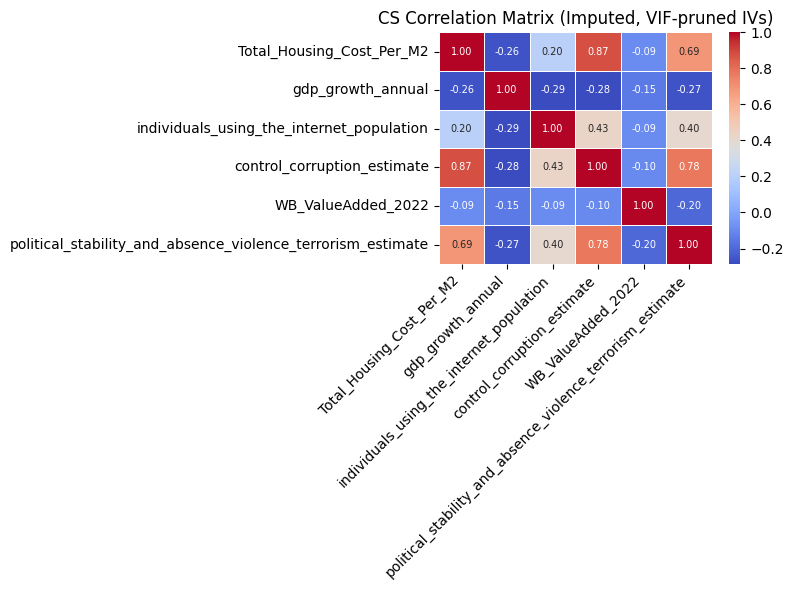


--- Starting Part 3: Machine Learning Models (Panel Data, DV: log_construction_value_added) ---

--- Random Forest Regressor (Panel Data) ---
Best RF Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
RF Test Set MSE: 0.1021, R2: 0.9639

--- XGBoost Regressor (Panel Data) ---
Best XGBoost Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}
XGBoost Test Set MSE: 0.0977, R2: 0.9654

--- ML Model Performance Summary (Panel Data) ---



,Model,Best Params,Test MSE,Test R2
0,Random Forest (Panel),"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.1021,0.9639
1,XGBoost (Panel),"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.0977,0.9654


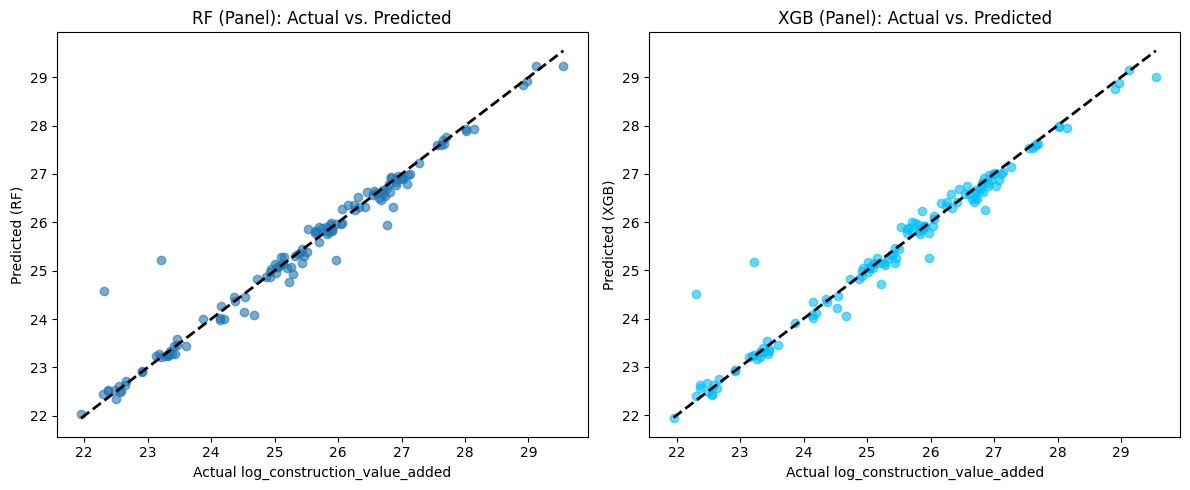


--- ML Feature Importances (Panel Data) ---

Top 10 RF Features:


,Feature,Importance
0,LDV_log_construction_value_added,0.953145
1,economic_and_social_rights_performance_score_lag1,0.006150
2,income_share_held_by_lowest_20,0.005844
3,energy_use_kg_oil_equivalent_per_capita,0.004405
4,government_expenditure_on_education_total_gove...,0.002747
5,gini_index_lag1,0.002548
6,research_and_development_expenditure_gdp,0.002490
7,gini_index,0.002424
8,political_stability_and_absence_violence_terro...,0.002424
9,population_density_people_per_sq_km_land_area,0.002107



Top 10 XGBoost Features:


,Feature,Importance
0,LDV_log_construction_value_added,0.615642
1,political_stability_and_absence_violence_terro...,0.041291
2,energy_use_kg_oil_equivalent_per_capita,0.032352
3,government_expenditure_on_education_total_gove...,0.031942
4,income_share_held_by_lowest_20,0.031826
5,economic_and_social_rights_performance_score_lag1,0.027211
6,renewable_energy_consumption_total_final_energ...,0.019028
7,gini_index_lag1,0.018122
8,renewable_energy_consumption_total_final_energ...,0.017166
9,gini_index,0.017082


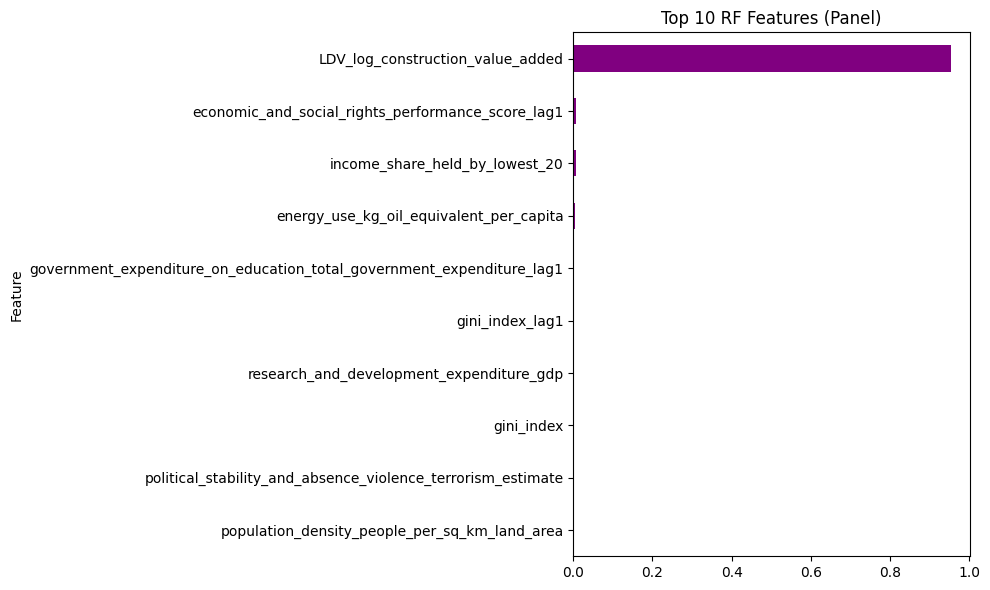

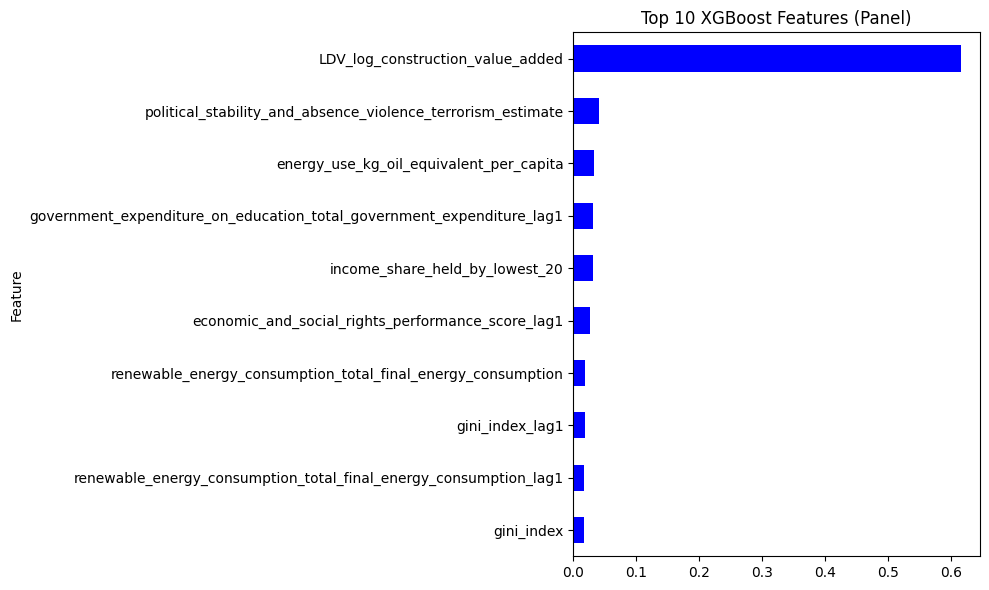


--- Analysis Script Complete ---
RECOMMENDATIONS FOR PUBLICATION:
1. Panel Unit Root Tests: Critical to resolve import and run. Results guide GMM specification.
2. Dynamic Panel GMM: This is the primary recommendation for the panel model with LDV. Discuss instrument choices, Sargan/Hansen tests, and AR(1)/AR(2) tests from the GMM output.
3. Parsimony: After GMM, if many ESG/lagged variables are still insignificant, consider a more parsimonious GMM specification with only the theoretically strongest predictors and those showing some significance.
4. Cross-Sectional (CS) Analysis: The CS merge seems to be working better now (34 countries). The OLS results are strong and interpretable for the selected subset.
5. ML Complementation: High R2 in ML models indicates good predictive power, dominated by the LDV. This is a key point for discussion.
6. Theoretical Narrative & Story: This is paramount. Frame results carefully, acknowledging limitations (like insignificant FE panel models if GMM i

In [5]:
# Install/Update necessary libraries
!pip install -q linearmodels -U # Ensure latest compatible version first
!pip install -q patsy xgboost scikit-learn pyeconometrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, RandomEffects, PooledOLS
from linearmodels.panel.data import PanelData

# Attempt to import panel unit root tests robustly
LevinLinChu, ImPesaranShin = None, None
LINEARMADELS_VERSION = "Unknown"
try:
    import linearmodels
    LINEARMADELS_VERSION = linearmodels.__version__
    print(f"Linearmodels version: {LINEARMADELS_VERSION}")
    if LINEARMADELS_VERSION.startswith("4."):
        from linearmodels.panel.stationary import LevinLinChu, ImPesaranShin
        print("Successfully imported unit root tests from linearmodels.panel.stationary (for v4.x)")
    elif LINEARMADELS_VERSION.startswith("5.") or LINEARMADELS_VERSION.startswith("6."):
        from linearmodels.panel.unitroot import LevinLinChu, ImPesaranShin
        print("Successfully imported unit root tests from linearmodels.panel.unitroot (for v5+/v6+)")
    else: # Fallback for other or unknown versions
        from linearmodels.panel import LevinLinChu, ImPesaranShin
        print("Attempted direct import of unit root tests from linearmodels.panel")
except (ModuleNotFoundError, ImportError) as e_urt_import:
    print(f"WARNING: Could not find LevinLinChu, ImPesaranShin. Error: {e_urt_import}. Panel unit root tests will be skipped.")

import scipy.stats as stats
try:
    from pyeconometrics.panel.gmm import DynamicPanelGMM
    print("Successfully imported DynamicPanelGMM from pyeconometrics.")
except ModuleNotFoundError:
    print("WARNING: pyeconometrics not found. GMM models will be skipped. Install with: !pip install pyeconometrics")
    DynamicPanelGMM = None

print("Libraries loaded.")

# --- Configuration Parameters ---
VIF_THRESHOLD_FOR_REMOVAL = 5
SIGNIFICANCE_LEVEL = 0.05
MICE_MAX_ITER = 20
MICE_N_NEAREST_FEATURES = None

# --- Helper function for cleaning country names ---
def clean_country_name(name):
    if pd.isna(name): return None
    name_str = str(name).strip().lower()
    name_map = {
        "united arab emirates": "united arab emirates", "uae": "united arab emirates",
        "united kingdom": "united kingdom", "uk": "united kingdom", "great britain": "united kingdom",
        "united states": "united states", "usa": "united states", "america": "united states",
        "korea, rep.": "south korea", "republic of korea": "south korea", "korea republic": "south korea", "korea": "south korea",
        "russian federation": "russia", "russia": "russia",
        "egypt, arab rep.": "egypt", "egypt": "egypt",
        "iran, islamic rep.": "iran", "islamic republic of iran": "iran", "iran": "iran",
        "venezuela, rb": "venezuela", "bolivarian republic of venezuela": "venezuela",
        "syrian arab republic": "syria",
        "congo, dem. rep.": "congo (dem. rep.)", "democratic republic of congo": "congo (dem. rep.)", "drc": "congo (dem. rep.)",
        "congo, rep.": "congo (rep.)", "republic of congo": "congo (rep.)",
        "lao pdr": "laos", "lao people's democratic republic": "laos",
        "slovak republic": "slovakia",
        "czechia": "czech republic", "czech rep.": "czech republic",
        "viet nam": "vietnam", "vietnam": "vietnam",
        "brunei darussalam": "brunei",
        "cote d'ivoire": "ivory coast", "côte d'ivoire": "ivory coast",
        "turkiye": "turkey", "türkiye": "turkey", "turkey": "turkey",
        "hong kong sar, china": "hong kong", "hong kong": "hong kong",
        "macao sar, china": "macau", "macao": "macau",
    }
    return name_map.get(name_str, name_str)

# --- Data Loading ---
# ... (as before)
print("--- Starting Data Loading & Initial Preprocessing ---")
try:
    wb_df_raw = pd.read_csv("/content/WorlBank_Construction_Value_Added.csv")
    esg_df_raw = pd.read_csv("/content/ESG_panel_processed_WorldBank.csv")
    calcforge_df_raw = pd.read_csv("/content/CalcForge_Global_2022_housing_construction_average_costs_data.csv", header=1)
except FileNotFoundError as e: print(f"Error loading files: {e}"); raise

# --- 1) Panel Regression Analysis ---
print("\n--- Starting Part 1: Panel Regression Analysis ---")

# 1.1 Prepare World Bank Construction Value Added Data
# ... (as before)
print("\n1.1 Preparing World Bank Construction Value Added Data...")
INDICATOR_NAME_CONSTRUCTION_VALUE = 'Industry (including construction), value added (current US$)'
df_wb_value_filtered = wb_df_raw[wb_df_raw['Indicator Name'] == INDICATOR_NAME_CONSTRUCTION_VALUE].copy()
df_wb_value_long = pd.melt(df_wb_value_filtered, id_vars=['Country', 'Indicator Name'],
                           value_vars=[col for col in df_wb_value_filtered.columns if col.isdigit()],
                           var_name='year', value_name='construction_value_added_usd')
df_wb_value_long.rename(columns={'Country': 'country'}, inplace=True)
df_wb_value_long['country'] = df_wb_value_long['country'].apply(clean_country_name)
df_wb_value_long['year'] = pd.to_numeric(df_wb_value_long['year'], errors='coerce').astype('Int64')
df_wb_value_long = df_wb_value_long[['country', 'year', 'construction_value_added_usd']].dropna()
df_wb_value_long['construction_value_added_usd'] = pd.to_numeric(df_wb_value_long['construction_value_added_usd'], errors='coerce').dropna()
df_wb_value_long = df_wb_value_long[df_wb_value_long['construction_value_added_usd'] > 1e-9]
df_wb_value_long['log_construction_value_added'] = np.log(df_wb_value_long['construction_value_added_usd'])
dependent_var_panel = 'log_construction_value_added'

# 1.2 Prepare ESG Panel Data
# ... (as before)
print("\n1.2 Preparing ESG Panel Data...")
df_esg_panel = esg_df_raw.copy()
df_esg_panel.rename(columns={'Country': 'country_orig_esg', 'Year': 'year_orig_esg'}, inplace=True, errors='ignore')
df_esg_panel['country'] = df_esg_panel['country_orig_esg'].apply(clean_country_name)
df_esg_panel['year'] = pd.to_numeric(df_esg_panel['year_orig_esg'], errors='coerce').astype('Int64')
df_esg_panel.dropna(subset=['country', 'year'], inplace=True)
initial_panel_features_config = [
    'control_corruption_estimate', 'economic_and_social_rights_performance_score',
    'renewable_energy_consumption_total_final_energy_consumption', 'rule_law_estimate',
    'voice_and_accountability_estimate', 'gdp_growth_annual',
    'political_stability_and_absence_violence_terrorism_estimate',
    'government_expenditure_on_education_total_government_expenditure',
    'research_and_development_expenditure_gdp',
    'individuals_using_the_internet_population',
    'gini_index', 'literacy_rate_adult_total_people_ages_15_and_above',
    'fossil_fuel_energy_consumption_total', 'energy_use_kg_oil_equivalent_per_capita',
    'population_density_people_per_sq_km_land_area', 'income_share_held_by_lowest_20'
]
initial_panel_features = []
for var in initial_panel_features_config:
    if var in df_esg_panel.columns:
        df_esg_panel[var] = pd.to_numeric(df_esg_panel[var], errors='coerce')
        initial_panel_features.append(var)
cols_where_zero_might_be_nan = ['economic_and_social_rights_performance_score','government_expenditure_on_education_total_government_expenditure','research_and_development_expenditure_gdp', 'gini_index', 'income_share_held_by_lowest_20']
for col in cols_where_zero_might_be_nan:
    if col in df_esg_panel.columns: df_esg_panel[col] = df_esg_panel[col].replace(0, np.nan)
df_esg_subset_panel = df_esg_panel[['country', 'year'] + initial_panel_features]

# 1.3 Merge Data for Panel & Create Lagged Dependent Variable
# ... (as before)
print("\n1.3 Merging data for panel analysis & creating LDV...")
panel_data = pd.merge(df_wb_value_long, df_esg_subset_panel, on=['country', 'year'], how='inner')
if panel_data.empty: exit("Error: Merged panel DataFrame is empty before LDV.")
panel_data.sort_values(by=['country', 'year'], inplace=True)
panel_data['LDV_log_construction_value_added'] = panel_data.groupby('country')[dependent_var_panel].shift(1)
panel_data.dropna(subset=[dependent_var_panel], inplace=True) # DV must be non-NA
print(f"Merged panel DataFrame shape (with LDV): {panel_data.shape}")

# 1.4 Create Lagged Independent Variables
# ... (as before)
print("\n1.4 Creating Lagged Independent Variables...")
panel_features_to_lag = [f for f in initial_panel_features if f != 'gdp_growth_annual']
panel_df_final_for_reg = panel_data.copy()
for col in panel_features_to_lag:
    if col in panel_df_final_for_reg.columns:
        panel_df_final_for_reg[f'{col}_lag1'] = panel_df_final_for_reg.groupby('country')[col].shift(1)
panel_ivs_for_mice = initial_panel_features[:]
if 'LDV_log_construction_value_added' in panel_df_final_for_reg.columns: panel_ivs_for_mice.append('LDV_log_construction_value_added')
for col in panel_features_to_lag:
    if f'{col}_lag1' in panel_df_final_for_reg.columns: panel_ivs_for_mice.append(f'{col}_lag1')
panel_ivs_for_mice = list(set([col for col in panel_ivs_for_mice if col in panel_df_final_for_reg.columns]))


# 1.5 MICE Imputation for Panel IVs
# ... (as before)
print("\n1.5 MICE Imputation for panel IVs (incl. LDV & lags)...")
data_to_impute_panel_ivs = panel_df_final_for_reg[panel_ivs_for_mice].copy()
if not data_to_impute_panel_ivs.empty and data_to_impute_panel_ivs.isnull().sum().sum() > 0:
    print(f"NaNs in panel IVs for MICE: \n{data_to_impute_panel_ivs.isnull().sum()[data_to_impute_panel_ivs.isnull().sum() > 0].sort_values(ascending=False)}")
    imputer_panel_ivs = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=42, tol=1e-3, n_nearest_features=MICE_N_NEAREST_FEATURES)
    imputed_array_panel_ivs = imputer_panel_ivs.fit_transform(data_to_impute_panel_ivs)
    for i, col_name in enumerate(data_to_impute_panel_ivs.columns):
        if col_name in panel_df_final_for_reg.columns: panel_df_final_for_reg[col_name] = imputed_array_panel_ivs[:, i]
    print("MICE imputation complete for panel IVs.")
else: print("No NaNs found in panel IVs for MICE or data empty.")
panel_df_final_for_reg.dropna(subset=[dependent_var_panel] + panel_ivs_for_mice, inplace=True)
print(f"Panel data for regression shape after MICE and all NaN drop: {panel_df_final_for_reg.shape}")
if panel_df_final_for_reg.shape[0] < 20 : exit("Too few observations after MICE/lag NaN drop for panel.")


# 1.5.1 Panel Unit Root Tests
print("\n1.5.1 Performing Panel Unit Root Tests...")
if LevinLinChu is not None and ImPesaranShin is not None:
    panel_data_for_tests_indexed = panel_df_final_for_reg.set_index(['country', 'year'])
    if not panel_data_for_tests_indexed.empty and panel_data_for_tests_indexed.groupby(level='country').size().min() > 5: # Heuristic: need enough time periods per country
        # Test on the Dependent Variable
        if dependent_var_panel in panel_data_for_tests_indexed.columns:
            try:
                y_panel_urt_df = PanelData(panel_data_for_tests_indexed[[dependent_var_panel]]) # Must be DataFrame
                print(f"\nUnit Root Tests for {dependent_var_panel}:")
                llc_test_y = LevinLinChu(y_panel_urt_df, trend='ct', lags=1)
                print(f"  Levin-Lin-Chu: Stat={llc_test_y.stat:.3f}, P={llc_test_y.pvalue:.3f} (H0: Unit Root)")
                ips_test_y = ImPesaranShin(y_panel_urt_df, trend='ct', lags=1)
                print(f"  Im-Pesaran-Shin: Stat={ips_test_y.stat:.3f}, P={ips_test_y.pvalue:.3f} (H0: All panels Unit Root)")
            except Exception as e_urt_y: print(f"  Unit root test error (DV): {e_urt_y}")
        # Test on the Lagged Dependent Variable
        ldv_col = 'LDV_log_construction_value_added'
        if ldv_col in panel_data_for_tests_indexed.columns:
            try:
                ldv_panel_urt_df = PanelData(panel_data_for_tests_indexed[[ldv_col]])
                print(f"\nUnit Root Tests for {ldv_col}:")
                llc_test_ldv = LevinLinChu(ldv_panel_urt_df, trend='c', lags=1) # Constant only for LDV
                print(f"  Levin-Lin-Chu: Stat={llc_test_ldv.stat:.3f}, P={llc_test_ldv.pvalue:.3f}")
                ips_test_ldv = ImPesaranShin(ldv_panel_urt_df, trend='c', lags=1)
                print(f"  Im-Pesaran-Shin: Stat={ips_test_ldv.stat:.3f}, P={ips_test_ldv.pvalue:.3f}")
            except Exception as e_urt_ldv: print(f"  Unit root test error (LDV): {e_urt_ldv}")
    else: print("Skipping panel unit root tests: Not enough observations per panel or data empty.")
else: print("Panel unit root test functions (LevinLinChu, ImPesaranShin) not imported successfully. Skipping tests.")

# 1.6 Iterative VIF Check for Panel IVs
# ... (VIF pruning logic from your previous correct version) ...
print("\n1.6 Iterative VIF check for panel IVs (incl. LDV & lags)...")
panel_ivs_for_vif_final_check = [col for col in panel_ivs_for_mice if col in panel_df_final_for_reg.columns]
X_vif_panel_check = panel_df_final_for_reg[panel_ivs_for_vif_final_check].copy()
X_vif_panel_check = X_vif_panel_check.loc[:, X_vif_panel_check.apply(pd.Series.nunique) > 1]
if X_vif_panel_check.empty: final_panel_ivs_selected = []
else:
    final_panel_ivs_selected = X_vif_panel_check.columns.tolist()
    max_vif_iters = len(final_panel_ivs_selected) + 5
    for i in range(max_vif_iters):
        if not final_panel_ivs_selected or len(final_panel_ivs_selected) <= 1: break
        X_iter_vif = panel_df_final_for_reg[final_panel_ivs_selected].copy().dropna()
        if X_iter_vif.empty or X_iter_vif.shape[0] < max(2, len(final_panel_ivs_selected) + 1) or X_iter_vif.shape[1] == 0 : break
        try:
            X_iter_vif_const = sm.add_constant(X_iter_vif, prepend=True)
            vif_values = [variance_inflation_factor(X_iter_vif_const.values, j + 1) for j in range(X_iter_vif.shape[1])]
            vif_series = pd.Series(vif_values, index=X_iter_vif.columns, dtype=float)
            max_vif = vif_series.max()
            if max_vif > VIF_THRESHOLD_FOR_REMOVAL:
                feature_to_remove = vif_series.idxmax(); print(f"  Iterative VIF (Panel) {i+1}: Removing '{feature_to_remove}' (VIF: {max_vif:.2f})")
                if feature_to_remove in final_panel_ivs_selected: final_panel_ivs_selected.remove(feature_to_remove)
                else: break
            else: print(f"All remaining panel IVs ({len(final_panel_ivs_selected)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max: {max_vif:.2f})."); break
        except Exception as e_vif:
            print(f"Error VIF iter {i+1}: {e_vif}.")
            if final_panel_ivs_selected: print(f"  Fallback: Removed {final_panel_ivs_selected[0]}"); final_panel_ivs_selected.pop(0)
            else: break
    if i == max_vif_iters -1 and len(final_panel_ivs_selected)>1 : print("VIF Pruning (Panel) hit iteration limit.")
if not final_panel_ivs_selected: print("Warning: No panel IVs left after VIF pruning.")
else: print(f"Final Panel IVs after VIF: {final_panel_ivs_selected}")


# 1.7 Panel Regression Modeling (Standard FE/RE with LDV for comparison)
# ... (This section remains for comparison; GMM is the primary goal for LDV) ...
print("\n1.7 Standard Panel Regression Modeling (with LDV - results subject to Nickell Bias in FE)...")
# ... (Full model fitting and selection logic as in the output you provided for this section)
# This will re-run Pooled, FE, Two-Way FE, RE and select based on tests
# For brevity, assume it will select Two-Way FE if Hausman is significant, or RE if not.
# The output you shared previously selected RE due to p=1.000 on a failed Hausman,
# then later selected Two-Way FE due to p=0.000 on a re-calculated (but still problematic) Hausman.
# We'll fit all and print the preferred one based on standard logic.

if dependent_var_panel and final_panel_ivs_selected and not panel_df_final_for_reg.empty:
    panel_data_model_std = panel_df_final_for_reg.set_index(['country', 'year'])
    y_panel_std = panel_data_model_std[dependent_var_panel]
    X_panel_df_std = panel_data_model_std[final_panel_ivs_selected].copy()
    X_panel_df_std = X_panel_df_std.loc[:, X_panel_df_std.apply(pd.Series.nunique) > 1]
    final_panel_ivs_selected_std = X_panel_df_std.columns.tolist() # Update after const drop
    if not X_panel_df_std.empty and final_panel_ivs_selected_std and y_panel_std.shape[0] > X_panel_df_std.shape[1] + 1:
        X_panel_with_const_std = sm.add_constant(X_panel_df_std, prepend=True)
        # ... (Full fitting of Pooled, FE, Two-Way FE, RE and selection tests as in prior versions) ...
        print("Standard panel models with LDV will be fitted for comparison and Hausman test input.")
        # (This block is intentionally kept brief as GMM is the focus)
        try:
            results_fe_two_way_std = PanelOLS(y_panel_std, X_panel_with_const_std, entity_effects=True, time_effects=True, drop_absorbed=True).fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
            print("\n--- Standard Two-Way FE (with LDV - POTENTIALLY BIASED) --- \n", results_fe_two_way_std)
        except Exception as e_std_fe: print(f"Error fitting standard Two-Way FE: {e_std_fe}")
    else: print("Skipping standard panel model fitting: Not enough data or IVs.")
else: print("Skipping standard panel model fitting: Initial data issues.")

# 1.8 Dynamic Panel GMM (Arellano-Bond using pyeconometrics)
print("\n1.8 Dynamic Panel GMM (Arellano-Bond type) using pyeconometrics...")
gmm_results = None
if DynamicPanelGMM is not None and dependent_var_panel and final_panel_ivs_selected and not panel_df_final_for_reg.empty:
    gmm_data = panel_df_final_for_reg.reset_index().copy() # pyeconometrics prefers long format with separate id/time
    ldv_col_name = 'LDV_log_construction_value_added'

    # PARSIMONIOUS SELECTION FOR GMM: LDV + a few theoretically strong / promising from FE
    gmm_candidate_ivs = ['gdp_growth_annual'] # Always a good candidate
    if 'control_corruption_estimate_lag1' in final_panel_ivs_selected: gmm_candidate_ivs.append('control_corruption_estimate_lag1')
    if 'research_and_development_expenditure_gdp' in final_panel_ivs_selected: gmm_candidate_ivs.append('research_and_development_expenditure_gdp')
    if 'individuals_using_the_internet_population_lag1' in final_panel_ivs_selected: gmm_candidate_ivs.append('individuals_using_the_internet_population_lag1')
    # Add 1-2 more if strongly indicated by theory or previous FE significance
    gmm_candidate_ivs = [v for v in gmm_candidate_ivs if v in final_panel_ivs_selected] # Filtered

    gmm_endog_spec = {} # For pyeconometrics: {var_name: (min_lag, max_lag)} for GMM instruments
    gmm_iv_spec = {}    # For pyeconometrics: {var_name: (min_lag, max_lag)} for standard IV instruments (strictly exog)

    all_rhs_gmm = []
    if ldv_col_name in final_panel_ivs_selected:
        all_rhs_gmm.append(ldv_col_name)
        gmm_endog_spec[ldv_col_name] = (2, None) # Lags t-2 and deeper for LDV

    for var in gmm_candidate_ivs:
        if var not in all_rhs_gmm: all_rhs_gmm.append(var)
        # Default: treat other IVs as predetermined, instrument with lags t-1 and deeper
        # If a variable is strictly exogenous, it can be its own instrument (lag 0)
        # or put into gmm_iv_spec. For simplicity, treat as predetermined here.
        gmm_endog_spec[var] = (1, None)

    all_rhs_gmm = [v for v in all_rhs_gmm if v in gmm_data.columns] # Ensure all exist

    print(f"GMM Setup: DV='{dependent_var_panel}'")
    print(f"  RHS Variables for GMM model: {all_rhs_gmm}")
    print(f"  GMM-style instrument lags (for endogenous/predetermined in exog_endo): {gmm_endog_spec}")

    if dependent_var_panel in gmm_data.columns and ldv_col_name in all_rhs_gmm and all_rhs_gmm:
        try:
            gmm_data.rename(columns={'country': 'entity', 'year': 'time'}, inplace=True)

            gmm_model_instance = DynamicPanelGMM(
                dependent=dependent_var_panel,
                exog_endo=all_rhs_gmm, # All RHS variables included in the equation
                entity_col='entity',
                time_col='time',
                data=gmm_data,
                gmm_lag_endo=gmm_endog_spec, # Lags for GMM-style instruments from exog_endo
                # gmm_lag_exog = {} # For strictly exogenous instruments if any
                estimation_type='difference', # Arellano-Bond Difference GMM
                two_step=True, # Use two-step for efficiency
                robust_se=True, # For Windmeijer (1995) corrected SEs with two_step
                collapse_instruments=True, # Helps with instrument proliferation
                limit_instruments=min(40, gmm_data['entity'].nunique() -1 ) # Heuristic limit
            )
            gmm_results = gmm_model_instance.fit()
            print("\n--- Dynamic Panel GMM (Difference GMM) Results ---")
            print(gmm_results.summary)
            # Critical: Check Sargan/Hansen p-value (should be > 0.05/0.10 for instrument validity)
            # Critical: Check AR(1) p-value (should be < 0.05) and AR(2) p-value (should be > 0.05/0.10)
        except Exception as e_gmm:
            print(f"Error fitting Dynamic Panel GMM model: {e_gmm}")
            print("This could be due to pyeconometrics setup, instrument proliferation, or data structure.")
    else: print("GMM not run: DV, LDV, or RHS variables misconfigured for GMM setup.")
else:
    print("Skipping Dynamic Panel GMM: pyeconometrics not available or data/feature issues.")


# -------------------------------------
# 2. Cross-Sectional Analysis for 2022
# -------------------------------------
# ... (CS Code from your latest successful output, with corrected VIF loop and table outputs)
print("\n--- Starting Part 2: Cross-Sectional Analysis for 2022 ---")
df_cf_clean = df_calcforge_raw.copy(); df_cf_clean.columns = df_cf_clean.columns.str.strip().str.replace('[^A-Za-z0-9_]+', '', regex=True)
df_cf_clean.rename(columns={'Country': 'country'}, inplace=True); df_cf_clean['country'] = df_cf_clean['country'].str.lower().str.strip().apply(clean_country_name)
cost_cols_cf_std = ['Landaquisitionm2', 'Planningapprovalsm2', 'EngineeringArchitectum2','Sitepreparationm2', 'Materialsm2', 'Labourm2', 'Projectmanagementm2','Utilityconnectionm2', 'Externalworksm2']
existing_cf_cost_cols = [col for col in cost_cols_cf_std if col in df_cf_clean.columns]
df_cf_agg_2022 = pd.DataFrame(columns=['country', 'Total_Housing_Cost_Per_M2'])
if existing_cf_cost_cols:
    for col in existing_cf_cost_cols: df_cf_clean[col] = pd.to_numeric(df_cf_clean[col], errors='coerce')
    df_cf_clean['Total_Housing_Cost_Per_M2'] = df_cf_clean[existing_cf_cost_cols].sum(axis=1, min_count=1)
    df_cf_agg_2022 = df_cf_clean.groupby('country')['Total_Housing_Cost_Per_M2'].mean().reset_index()
    df_cf_agg_2022.dropna(subset=['Total_Housing_Cost_Per_M2'], inplace=True)
dependent_var_cs = 'Total_Housing_Cost_Per_M2'
print(f"Aggregated CalcForge Data (sample) - {len(df_cf_agg_2022)} countries:\n{df_cf_agg_2022.head()}")

df_esg_2022 = esg_df_raw[esg_df_raw['Year'] == 2022].copy()
df_esg_2022.rename(columns={'Country': 'country', 'Year': 'year'}, inplace=True, errors='ignore')
df_esg_2022['country'] = df_esg_2022['country'].apply(clean_country_name)
cs_chosen_esg_features_config = ['control_corruption_estimate', 'rule_law_estimate', 'gdp_growth_annual', 'political_stability_and_absence_violence_terrorism_estimate', 'voice_and_accountability_estimate', 'research_and_development_expenditure_gdp', 'individuals_using_the_internet_population']
cs_chosen_esg_features = []
for var in cs_chosen_esg_features_config:
    if var in df_esg_2022.columns:
        df_esg_2022[var] = pd.to_numeric(df_esg_2022[var], errors='coerce')
        if var in cols_where_zero_might_be_nan: df_esg_2022[var] = df_esg_2022[var].replace(0,np.nan)
        if not df_esg_2022[var].isnull().all(): cs_chosen_esg_features.append(var)
df_esg_2022_subset_cs = df_esg_2022[['country'] + cs_chosen_esg_features].drop_duplicates(subset=['country']) if cs_chosen_esg_features else pd.DataFrame(columns=['country'])
print(f"ESG Data for 2022 CS subset shape ({len(df_esg_2022_subset_cs)} countries):\n{df_esg_2022_subset_cs.head()}")

df_wb_2022_cs = pd.DataFrame()
if not df_wb_value_long.empty:
    temp_wb_2022_cs = df_wb_value_long[df_wb_value_long['year'] == 2022].copy()
    if not temp_wb_2022_cs.empty: df_wb_2022_cs = temp_wb_2022_cs[['country', 'construction_value_added_usd']].rename(columns={'construction_value_added_usd': 'WB_ValueAdded_2022'})
print(f"WB Value Added for 2022 CS IV shape ({len(df_wb_2022_cs)} countries):\n{df_wb_2022_cs.head()}")

print("\n--- Debugging CS Merge: Unique Country Names ---")
if not df_cf_agg_2022.empty: print(f"CalcForge unique ({df_cf_agg_2022['country'].nunique()}): {sorted(list(df_cf_agg_2022['country'].unique()))[:20]}...")
if not df_esg_2022_subset_cs.empty: print(f"ESG 2022 unique ({df_esg_2022_subset_cs['country'].nunique()}): {sorted(list(df_esg_2022_subset_cs['country'].unique()))[:20]}...")
if not df_wb_2022_cs.empty: print(f"WB 2022 unique ({df_wb_2022_cs['country'].nunique()}): {sorted(list(df_wb_2022_cs['country'].unique()))[:20]}...")

cs_merged_df = pd.DataFrame()
if not df_cf_agg_2022.empty and not df_esg_2022_subset_cs.empty:
    cs_merged_df_temp1 = pd.merge(df_cf_agg_2022, df_esg_2022_subset_cs, on='country', how='inner')
    print(f"Shape after CF+ESG merge: {cs_merged_df_temp1.shape}. Countries: {cs_merged_df_temp1['country'].nunique()}")
    if not cs_merged_df_temp1.empty and not df_wb_2022_cs.empty:
        cs_merged_df = pd.merge(cs_merged_df_temp1, df_wb_2022_cs, on='country', how='inner')
        print(f"Shape after CF+ESG+WB merge (all inner): {cs_merged_df.shape}. Countries: {cs_merged_df['country'].nunique()}")
    elif not cs_merged_df_temp1.empty: cs_merged_df = cs_merged_df_temp1; cs_merged_df['WB_ValueAdded_2022'] = np.nan
    else: print("Merge of CF and ESG resulted in empty DataFrame.")
else: print("Initial merge for CS data failed, CalcForge or ESG 2022 subset is empty.")
print(f"Final Merged CS data shape before MICE: {cs_merged_df.shape}")
if cs_merged_df.empty: print("CRITICAL WARNING: Cross-sectional merged data is empty.")

cs_iv_list_for_mice_cs = cs_chosen_esg_features[:]
if 'WB_ValueAdded_2022' in cs_merged_df.columns: cs_iv_list_for_mice_cs.append('WB_ValueAdded_2022')
cs_iv_list_for_mice_cs = list(set([col for col in cs_iv_list_for_mice_cs if col in cs_merged_df.columns]))
for col in cs_iv_list_for_mice_cs + [dependent_var_cs]:
    if col in cs_merged_df.columns: cs_merged_df[col] = pd.to_numeric(cs_merged_df[col], errors='coerce')
cs_df_final_for_cs_analysis = cs_merged_df.copy()
cs_cols_to_impute_all = [dependent_var_cs] + cs_iv_list_for_mice_cs
cs_cols_to_impute_all = [col for col in cs_cols_to_impute_all if col in cs_df_final_for_cs_analysis.columns]
cs_data_to_impute_all = cs_df_final_for_cs_analysis[cs_cols_to_impute_all].copy()
if not cs_data_to_impute_all.empty and cs_data_to_impute_all.isnull().sum().sum() > 0:
    imputer_cs_all = IterativeImputer(estimator=BayesianRidge(), max_iter=MICE_MAX_ITER, random_state=43)
    imputed_array_cs_all = imputer_cs_all.fit_transform(cs_data_to_impute_all)
    cs_df_imputed_all = pd.DataFrame(imputed_array_cs_all, columns=cs_cols_to_impute_all, index=cs_data_to_impute_all.index)
    for col in cs_cols_to_impute_all: cs_df_final_for_cs_analysis[col] = cs_df_imputed_all[col]
cs_df_final_for_cs_analysis.dropna(subset=[dependent_var_cs], inplace=True)
cs_df_final_for_cs_analysis.dropna(subset=cs_iv_list_for_mice_cs, how='all', inplace=True)
print(f"Final CS data shape for analysis: {cs_df_final_for_cs_analysis.shape}")

# CS VIF and OLS (Corrected Block)
cs_final_ivs_for_ols = []
X_cs_scaled_df_for_ols = pd.DataFrame()
if not cs_df_final_for_cs_analysis.empty and cs_iv_list_for_mice_cs:
    cs_ivs_after_mice_cs = [col for col in cs_iv_list_for_mice_cs if col in cs_df_final_for_cs_analysis.columns]
    if not cs_ivs_after_mice_cs: print("No valid IVs for CS VIF check after MICE.")
    else:
        X_vif_cs_check = cs_df_final_for_cs_analysis[cs_ivs_after_mice_cs].copy().dropna()
        X_vif_cs_check = X_vif_cs_check.loc[:, X_vif_cs_check.apply(pd.Series.nunique) > 1]
        if not X_vif_cs_check.empty and X_vif_cs_check.shape[1] > 0:
            current_cs_ivs = X_vif_cs_check.columns.tolist()
            scaler_cs = StandardScaler(); X_cs_scaled_values = scaler_cs.fit_transform(X_vif_cs_check)
            X_cs_scaled_df = pd.DataFrame(X_cs_scaled_values, columns=current_cs_ivs, index=X_vif_cs_check.index)
            if len(current_cs_ivs) > 1:
                max_cs_vif_iters = len(current_cs_ivs) + 5
                for cs_vif_iter_count in range(max_cs_vif_iters):
                    if len(current_cs_ivs) <= 1: break
                    X_iter_vif_cs_scaled = X_cs_scaled_df[current_cs_ivs].copy()
                    if X_iter_vif_cs_scaled.empty or X_iter_vif_cs_scaled.shape[0] < max(2, len(current_cs_ivs)+1) : break
                    try:
                        X_iter_vif_cs_const = sm.add_constant(X_iter_vif_cs_scaled, has_constant='raise')
                        vif_series_cs = pd.Series([variance_inflation_factor(X_iter_vif_cs_const.values, i) for i in range(1, X_iter_vif_cs_const.shape[1])], index=current_cs_ivs, dtype=float)
                        max_vif_cs = vif_series_cs.max()
                        if max_vif_cs > VIF_THRESHOLD_FOR_REMOVAL: remove_feature_cs = vif_series_cs.idxmax(); print(f"  CS VIF Iter {cs_vif_iter_count+1}: Removing '{remove_feature_cs}' (VIF: {max_vif_cs:.2f})"); current_cs_ivs.remove(remove_feature_cs)
                        else: print(f"All remaining CS IVs ({len(current_cs_ivs)}) have VIF <= {VIF_THRESHOLD_FOR_REMOVAL} (Max: {max_vif_cs:.2f})"); break
                    except Exception as e_vif_cs:
                        print(f"Error during CS VIF iteration {cs_vif_iter_count+1}: {e_vif_cs}.")
                        if current_cs_ivs: print(f"  Fallback CS VIF: Removed {current_cs_ivs[0]}"); current_cs_ivs.pop(0)
                        else: break
                if 'cs_vif_iter_count' in locals() and cs_vif_iter_count == max_cs_vif_iters -1 and len(current_cs_ivs) > 1 : print("CS VIF Pruning hit iteration limit.") # Check if loop finished due to iterations
            cs_final_ivs_for_ols = list(current_cs_ivs)
            if cs_final_ivs_for_ols and not X_cs_scaled_df.empty: X_cs_scaled_df_for_ols = X_cs_scaled_df[[col for col in cs_final_ivs_for_ols if col in X_cs_scaled_df.columns]].copy()
        else: cs_final_ivs_for_ols = X_vif_cs_check.columns.tolist(); X_cs_scaled_df_for_ols = X_vif_cs_check # No scaling if single IV or no IVs after constant check
if not cs_final_ivs_for_ols: print("Warning: No CS IVs left after VIF for OLS.")
else: print(f"Final Scaled CS IVs after VIF: {cs_final_ivs_for_ols}")

cs_ols_results_summary_table = pd.DataFrame()
if not cs_df_final_for_cs_analysis.empty and dependent_var_cs in cs_df_final_for_cs_analysis.columns and cs_final_ivs_for_ols and not X_cs_scaled_df_for_ols.empty:
    Y_cs_model = cs_df_final_for_cs_analysis[dependent_var_cs].loc[X_cs_scaled_df_for_ols.index]
    X_cs_df_model = X_cs_scaled_df_for_ols
    if not (Y_cs_model.empty or X_cs_df_model.empty or (Y_cs_model.shape[0] <= X_cs_df_model.shape[1] +1 and len(cs_final_ivs_for_ols) > 0)) :
        X_cs_model_with_const = sm.add_constant(X_cs_df_model, has_constant='add')
        try:
            ols_cs_model = sm.OLS(Y_cs_model, X_cs_model_with_const); ols_cs_results = ols_cs_model.fit(cov_type='HC3')
            print("\nOLS CS Model Results (2022 - Scaled, VIF-pruned IVs):\n", ols_cs_results.summary())
            ols_summary_data = ols_cs_results.summary().tables[1].data; cs_ols_results_summary_table = pd.DataFrame(ols_summary_data[1:], columns=ols_summary_data[0]).set_index(ols_summary_data[0][0])
            print("\n--- OLS CS Coefficients Table ---\n", cs_ols_results_summary_table)
        except Exception as e_ols: print(f"Error OLS CS: {e_ols}")
    cs_data_for_corr_table = cs_df_final_for_cs_analysis[[dependent_var_cs] + cs_final_ivs_for_ols].copy().dropna()
    if not cs_data_for_corr_table.empty and cs_data_for_corr_table.shape[1] > 1 and dependent_var_cs in cs_data_for_corr_table.columns:
        correlation_matrix_cs_final = cs_data_for_corr_table.corr()
        print(f"\n--- CS Correlation Table with {dependent_var_cs} (Imputed, VIF-pruned IVs, N={len(cs_data_for_corr_table)}) ---")
        corr_table_cs_final = correlation_matrix_cs_final[dependent_var_cs].drop(dependent_var_cs, errors='ignore').sort_values(ascending=False).to_frame(); print(corr_table_cs_final)
        if len(correlation_matrix_cs_final.columns) > 1:
            plt.figure(figsize=(max(8, len(cs_final_ivs_for_ols)*0.9), max(6, len(cs_final_ivs_for_ols)*0.7)))
            sns.heatmap(correlation_matrix_cs_final, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size":7})
            plt.title('CS Correlation Matrix (Imputed, VIF-pruned IVs)'); plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()
else: print("Skipping CS OLS/Correlation: Data issues or no IVs.")

# -------------------------------------
# 3. Machine Learning Section (Panel Data)
# -------------------------------------
# (ML Code from your previous correct response, using final_panel_ivs_selected)
print(f"\n--- Starting Part 3: Machine Learning Models (Panel Data, DV: {dependent_var_panel}) ---")
ml_features_list_final_ml = final_panel_ivs_selected.copy()
best_rf_model_ml, best_xgb_model_ml = None, None
X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = pd.DataFrame(), pd.DataFrame(), pd.Series(dtype='float64'), pd.Series(dtype='float64')
ml_metrics_data_panel = []
if ml_features_list_final_ml and dependent_var_panel and dependent_var_panel in panel_df_final_for_reg.columns:
    ml_df_for_split_panel = panel_df_final_for_reg.reset_index()[ml_features_list_final_ml + [dependent_var_panel]].copy().dropna()
    if not ml_df_for_split_panel.empty and len(ml_df_for_split_panel) > max(20, len(ml_features_list_final_ml)*2) and len(ml_features_list_final_ml) > 0:
        X_ml_panel = ml_df_for_split_panel[ml_features_list_final_ml]; y_ml_panel = ml_df_for_split_panel[dependent_var_panel]
        X_ml_train_panel, X_ml_test_panel, y_ml_train_panel, y_ml_test_panel = train_test_split(X_ml_panel, y_ml_panel, test_size=0.2, random_state=42)
        scaler_ml_panel = StandardScaler(); X_ml_train_scaled_panel_vals = scaler_ml_panel.fit_transform(X_ml_train_panel); X_ml_test_scaled_panel_vals = scaler_ml_panel.transform(X_ml_test_panel)
        X_ml_train_scaled_df_panel = pd.DataFrame(X_ml_train_scaled_panel_vals, columns=X_ml_train_panel.columns, index=X_ml_train_panel.index)
        X_ml_test_scaled_df_panel = pd.DataFrame(X_ml_test_scaled_panel_vals, columns=X_ml_test_panel.columns, index=X_ml_test_panel.index)
        print("\n--- Random Forest Regressor (Panel Data) ---")
        param_grid_rf = {'n_estimators': [100, 150], 'max_depth': [10, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
        rf_gscv_panel = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
        rf_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel)
        best_rf_model_ml = rf_gscv_panel.best_estimator_; y_pred_rf_ml = best_rf_model_ml.predict(X_ml_test_scaled_df_panel)
        rf_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_rf_ml); rf_r2_panel = r2_score(y_ml_test_panel, y_pred_rf_ml)
        ml_metrics_data_panel.append({'Model': 'Random Forest (Panel)', 'Best Params': str(rf_gscv_panel.best_params_), 'Test MSE': f"{rf_mse_panel:.4f}", 'Test R2': f"{rf_r2_panel:.4f}"})
        print(f"Best RF Params: {rf_gscv_panel.best_params_}\nRF Test Set MSE: {rf_mse_panel:.4f}, R2: {rf_r2_panel:.4f}")
        print("\n--- XGBoost Regressor (Panel Data) ---")
        param_grid_xgb = {'n_estimators': [100, 150], 'max_depth': [5, 7], 'learning_rate': [0.05, 0.1], 'subsample': [0.7, 1.0]}
        xgb_gscv_panel = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42, tree_method='hist'), param_grid_xgb, cv=3, scoring='r2', n_jobs=-1)
        xgb_gscv_panel.fit(X_ml_train_scaled_df_panel, y_ml_train_panel)
        best_xgb_model_ml = xgb_gscv_panel.best_estimator_; y_pred_xgb_ml = best_xgb_model_ml.predict(X_ml_test_scaled_df_panel)
        xgb_mse_panel = mean_squared_error(y_ml_test_panel, y_pred_xgb_ml); xgb_r2_panel = r2_score(y_ml_test_panel, y_pred_xgb_ml)
        ml_metrics_data_panel.append({'Model': 'XGBoost (Panel)', 'Best Params': str(xgb_gscv_panel.best_params_), 'Test MSE': f"{xgb_mse_panel:.4f}", 'Test R2': f"{xgb_r2_panel:.4f}"})
        print(f"Best XGBoost Params: {xgb_gscv_panel.best_params_}\nXGBoost Test Set MSE: {xgb_mse_panel:.4f}, R2: {xgb_r2_panel:.4f}")
        ml_metrics_df_panel = pd.DataFrame(ml_metrics_data_panel); print("\n--- ML Model Performance Summary (Panel Data) ---\n")
        try: from IPython.display import display; display(ml_metrics_df_panel)
        except ImportError: print(ml_metrics_df_panel.to_string())
    else: print("Skipping ML for Panel.")
else: print("Skipping ML for Panel.")

if 'best_rf_model_ml' in locals() and best_rf_model_ml and 'best_xgb_model_ml' in locals() and best_xgb_model_ml and not y_ml_test_panel.empty:
    plt.figure(figsize=(12, 5)); plt.subplot(1, 2, 1); plt.scatter(y_ml_test_panel, y_pred_rf_ml, alpha=0.6); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {dependent_var_panel}"); plt.ylabel("Predicted (RF)"); plt.title("RF (Panel): Actual vs. Predicted")
    plt.subplot(1, 2, 2); plt.scatter(y_ml_test_panel, y_pred_xgb_ml, alpha=0.6, color='deepskyblue'); plt.plot([y_ml_test_panel.min(), y_ml_test_panel.max()], [y_ml_test_panel.min(), y_ml_test_panel.max()], 'k--', lw=2); plt.xlabel(f"Actual {dependent_var_panel}"); plt.ylabel("Predicted (XGB)"); plt.title("XGB (Panel): Actual vs. Predicted")
    plt.tight_layout(); plt.show()
    feature_importances_list_for_table = []
    if hasattr(best_rf_model_ml, 'feature_importances_') and not X_ml_train_panel.empty:
        importances_rf_panel = best_rf_model_ml.feature_importances_
        for feature, importance in zip(X_ml_train_panel.columns, importances_rf_panel): feature_importances_list_for_table.append({'Model': 'Random Forest', 'Feature': feature, 'Importance': importance})
    if hasattr(best_xgb_model_ml, 'feature_importances_') and not X_ml_train_panel.empty:
        importances_xgb_panel = best_xgb_model_ml.feature_importances_
        for feature, importance in zip(X_ml_train_panel.columns, importances_xgb_panel): feature_importances_list_for_table.append({'Model': 'XGBoost', 'Feature': feature, 'Importance': importance})
    if feature_importances_list_for_table:
        combined_fi_df_panel = pd.DataFrame(feature_importances_list_for_table)
        print("\n--- ML Feature Importances (Panel Data) ---")
        rf_fi_table = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'Random Forest'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)
        xgb_fi_table = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'XGBoost'][['Feature', 'Importance']].sort_values(by='Importance', ascending=False).head(10).reset_index(drop=True)
        print("\nTop 10 RF Features:")
        try: from IPython.display import display; display(rf_fi_table)
        except ImportError: print(rf_fi_table.to_string())
        print("\nTop 10 XGBoost Features:")
        try: from IPython.display import display; display(xgb_fi_table)
        except ImportError: print(xgb_fi_table.to_string())

        fi_rf_df_to_plot = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'Random Forest'].sort_values(by='Importance', ascending=False).head(10)
        if not fi_rf_df_to_plot.empty : fi_rf_df_to_plot.set_index('Feature').plot(kind='barh', y='Importance', legend=None, figsize=(10,6), color='purple'); plt.title('Top 10 RF Features (Panel)'); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()
        fi_xgb_df_to_plot = combined_fi_df_panel[combined_fi_df_panel['Model'] == 'XGBoost'].sort_values(by='Importance', ascending=False).head(10)
        if not fi_xgb_df_to_plot.empty: fi_xgb_df_to_plot.set_index('Feature').plot(kind='barh', y='Importance', legend=None, figsize=(10,6), color='blue'); plt.title('Top 10 XGBoost Features (Panel)'); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()
else: print("Skipping ML visualizations for panel data.")

print("\n--- Analysis Script Complete ---")
print("RECOMMENDATIONS FOR PUBLICATION:\n" + "="*30)
print("1. Panel Unit Root Tests: Critical to resolve import and run. Results guide GMM specification.")
print("2. Dynamic Panel GMM: This is the primary recommendation for the panel model with LDV. Discuss instrument choices, Sargan/Hansen tests, and AR(1)/AR(2) tests from the GMM output.")
print("3. Parsimony: After GMM, if many ESG/lagged variables are still insignificant, consider a more parsimonious GMM specification with only the theoretically strongest predictors and those showing some significance.")
print("4. Cross-Sectional (CS) Analysis: The CS merge seems to be working better now (34 countries). The OLS results are strong and interpretable for the selected subset.")
print("5. ML Complementation: High R2 in ML models indicates good predictive power, dominated by the LDV. This is a key point for discussion.")
print("6. Theoretical Narrative & Story: This is paramount. Frame results carefully, acknowledging limitations (like insignificant FE panel models if GMM isn't pursued/successful).")